# Problem Statement:
Attrition is a problem that impacts all businesses, irrespective of geography, industry and size of the company. Employee attrition leads to significant costs for a business, including the cost of business disruption, hiring new staff and training new staff. As such, there is great business interest in understanding the drivers of, and minimizing staff attrition.

This data set presents an employee survey , indicating if there is attrition or not. The data set contains approximately 24000 entries. Given the limited size of the data set, the model should only be expected to provide modest improvement in indentification of attrition vs a random allocation of probability of attrition.

While some level of attrition in a company is inevitable, minimizing it and being prepared for the cases that cannot be helped will significantly help improve the operations of most businesses. As a future development, with a sufficiently large data set, it would be used to run a segmentation on employees, to develop certain “at risk” categories of employees. This could generate new insights for the business on what drives attrition, insights that cannot be generated by merely informational interviews with employees.

Importing the necessary libraries

# Importing the necessary libraries 

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Increasing the display width

In [150]:
pd.set_option('display.max_columns',37)

In [151]:
df=pd.read_csv('F:\data science\data sets\IBM_HR.csv')


C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,8,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [152]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,Application ID,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123456,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123458,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,7,123462,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,8,123463,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,9,123464,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral


In [153]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,Application ID,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
23431,60.0,Current employee,Travel_Rarely,370.0,Research & Development,1,4.0,Medical,1,19344,142799,3.0,Male,92,1.0,3.0,Healthcare Representative,4,Single,10883,20467.0,3.0,Y,No,20,4.0,3.0,80.0,1.0,20.0,2.0,3.0,20.0,7.0,2.0,13.0,Company Website
23432,60.0,Current employee,Travel_Rarely,370.0,Research & Development,1,4.0,Life Sciences,1,19345,142800,3.0,Male,92,1.0,3.0,Healthcare Representative,4,Divorced,10883,20467.0,0.0,Y,No,20,4.0,3.0,80.0,1.0,19.0,2.0,4.0,1.0,0.0,0.0,0.0,Company Website
23433,NaN,Voluntary Resignation,Travel_Frequently,1009.0,Research & Development,1,3.0,Life Sciences,1,16794,140249,4.0,Male,83,3.0,2.0,Sales Executive,3,Married,5301,2939.0,4.0,Y,No,15,3.0,3.0,80.0,2.0,4.0,2.0,2.0,2.0,1.0,2.0,2.0,Adzuna
23434,NaN,Current employee,Travel_Rarely,1354.0,Research & Development,5,3.0,Medical,1,1956,125411,3.0,Female,45,2.0,3.0,Manager,1,Single,11631,5615.0,2.0,Y,No,12,3.0,4.0,80.0,0.0,14.0,6.0,3.0,11.0,10.0,5.0,8.0,Indeed
23435,NaN,Current employee,Non-Travel,1142.0,Research & Development,8,2.0,Life Sciences,1,17587,141042,4.0,Male,72,3.0,2.0,Healthcare Representative,4,Divorced,4069,8841.0,3.0,Y,Yes,18,3.0,3.0,80.0,0.0,8.0,2.0,3.0,2.0,2.0,2.0,2.0,Recruit.net


In [156]:
df.shape


(23436, 37)

In [154]:
# As such raw data is in cluster form its better to shuffle data before performing any cleaning process

In [157]:
df=shuffle(df)

In [158]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,Application ID,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
2259,34.0,Current employee,Travel_Rarely,1346.0,Research & Development,19,2.0,Medical,1,12768,136223,3.0,Male,72,3.0,1.0,Laboratory Technician,4,Married,3691,4605.0,1.0,Y,Yes,15,3.0,2.0,80.0,1.0,7.0,3.0,4.0,7.0,7.0,5.0,6.0,Recruit.net
18358,38.0,Current employee,Travel_Frequently,653.0,Research & Development,29,5.0,Life Sciences,1,1040,124495,1.0,Male,40,3.0,3.0,Sales Executive,1,Married,9069,11031.0,1.0,Y,No,22,3.0,4.0,80.0,1.0,9.0,3.0,2.0,9.0,8.0,1.0,8.0,Seek
16292,58.0,Voluntary Resignation,Travel_Frequently,781.0,Research & Development,2,1.0,Life Sciences,1,10606,134061,4.0,Male,57,2.0,1.0,Laboratory Technician,4,Divorced,2380,13384.0,1.0,Y,Yes,14,3.0,4.0,80.0,1.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0,LinkedIn
1546,18.0,Current employee,Non-Travel,287.0,Research & Development,5,2.0,Life Sciences,1,11663,135118,2.0,Male,73,3.0,1.0,Research Scientist,4,Single,1051,13493.0,3.0,Y,No,15,3.0,4.0,80.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,Indeed
17622,45.0,Voluntary Resignation,Travel_Rarely,1449.0,Sales,2,3.0,Marketing,1,11792,135247,3.0,Male,70,2.0,3.0,Healthcare Representative,3,Single,10999,22245.0,7.0,Y,No,14,3.0,2.0,80.0,0.0,27.0,3.0,3.0,15.0,11.0,4.0,8.0,Jora


In [160]:
# descriptive statistics 

In [161]:
df.describe()

,Age,DailyRate,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,MonthlyRate,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,23433.000000,23424.000000,23424.000000,23427.000000,23427.000000,23429.000000,23425.000000,23427.000000,23426.000000,23428.000000,23426.000000,23427.000000,23428.00000,23425.000000,23426.000000,23423.000000,23421.000000,23425.000000,23429.000000
mean,36.936671,801.828765,2.910050,13.681777,2.733811,2.064023,14304.343821,3.887779,3.155852,2.713334,79.993469,0.799846,11.25922,2.800171,2.761803,7.010887,4.227445,2.183821,4.127577
std,9.137432,403.206166,1.024931,1186.544372,0.836860,1.105421,7102.636293,155.332904,0.371215,1.080030,0.706850,1.122454,7.77237,1.308527,0.705788,6.138394,3.627284,3.218615,3.572379
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,2094.000000,0.000000,3.000000,1.000000,3.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,1.000000,8053.000000,1.000000,3.000000,2.000000,80.000000,0.000000,6.00000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,3.000000,3.000000,3.000000,2.000000,14222.000000,2.000000,3.000000,3.000000,80.000000,1.000000,10.00000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,4.000000,4.000000,3.000000,3.000000,20460.000000,4.000000,3.000000,4.000000,80.000000,1.000000,15.00000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,6.000000,129588.000000,54.000000,5.000000,26999.000000,23258.000000,13.000000,4.000000,80.000000,80.000000,40.00000,30.000000,4.000000,40.000000,22.000000,17.000000,17.000000


In [162]:
df.describe(include="all")

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,Application ID,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
count,23433.000000,23423,23428,23424.000000,23425,23427,23424.000000,23427,23431,23435,23433,23427.000000,23426,23427,23427.000000,23429.000000,23427,23427,23425,23423,23425.000000,23427.000000,23426,23424,23422,23426.000000,23428.000000,23426.000000,23427.000000,23428.00000,23425.000000,23426.000000,23423.000000,23421.000000,23425.000000,23429.000000,23424
unique,NaN,2,3,NaN,4,59,NaN,8,3,23366,23419,NaN,4,73,NaN,NaN,11,5,4,1351,NaN,NaN,2,3,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
top,NaN,Current employee,Travel_Rarely,NaN,Research & Development,1,NaN,Life Sciences,1,23244,123458,NaN,Male,66,NaN,NaN,Sales Executive,4,Married,2342,NaN,NaN,Y,No,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Company Website
freq,NaN,19714,16620,NaN,15286,2416,NaN,9701,16378,7,2,NaN,14056,480,NaN,NaN,5111,7276,10709,66,NaN,NaN,23424,16790,3353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5400
mean,36.936671,NaN,NaN,801.828765,NaN,NaN,2.910050,NaN,NaN,NaN,NaN,13.681777,NaN,NaN,2.733811,2.064023,NaN,NaN,NaN,NaN,14304.343821,3.887779,NaN,NaN,NaN,3.155852,2.713334,79.993469,0.799846,11.25922,2.800171,2.761803,7.010887,4.227445,2.183821,4.127577,NaN
std,9.137432,NaN,NaN,403.206166,NaN,NaN,1.024931,NaN,NaN,NaN,NaN,1186.544372,NaN,NaN,0.836860,1.105421,NaN,NaN,NaN,NaN,7102.636293,155.332904,NaN,NaN,NaN,0.371215,1.080030,0.706850,1.122454,7.77237,1.308527,0.705788,6.138394,3.627284,3.218615,3.572379,NaN
min,18.000000,NaN,NaN,102.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,2094.000000,0.000000,NaN,NaN,NaN,3.000000,1.000000,3.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,30.000000,NaN,NaN,465.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,8053.000000,1.000000,NaN,NaN,NaN,3.000000,2.000000,80.000000,0.000000,6.00000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,NaN
50%,36.000000,NaN,NaN,802.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,3.000000,2.000000,NaN,NaN,NaN,NaN,14222.000000,2.000000,NaN,NaN,NaN,3.000000,3.000000,80.000000,1.000000,10.00000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,NaN
75%,43.000000,NaN,NaN,1157.000000,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,3.000000,3.000000,NaN,NaN,NaN,NaN,20460.000000,4.000000,NaN,NaN,NaN,3.000000,4.000000,80.000000,1.000000,15.00000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,NaN


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23436 entries, 2259 to 5923
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23433 non-null  float64
 1   Attrition                 23423 non-null  object 
 2   BusinessTravel            23428 non-null  object 
 3   DailyRate                 23424 non-null  float64
 4   Department                23425 non-null  object 
 5   DistanceFromHome          23427 non-null  object 
 6   Education                 23424 non-null  float64
 7   EducationField            23427 non-null  object 
 8   EmployeeCount             23431 non-null  object 
 9   EmployeeNumber            23435 non-null  object 
 10  Application ID            23433 non-null  object 
 11  EnvironmentSatisfaction   23427 non-null  float64
 12  Gender                    23426 non-null  object 
 13  HourlyRate                23427 non-null  object 
 14  JobI

# Checking for the null values:

In [164]:
df.isnull().sum()

Age                          3
Attrition                   13
BusinessTravel               8
DailyRate                   12
Department                  11
DistanceFromHome             9
Education                   12
EducationField               9
EmployeeCount                5
EmployeeNumber               1
Application ID               3
EnvironmentSatisfaction      9
Gender                      10
HourlyRate                   9
JobInvolvement               9
JobLevel                     7
JobRole                      9
JobSatisfaction              9
MaritalStatus               11
MonthlyIncome               13
MonthlyRate                 11
NumCompaniesWorked           9
Over18                      10
OverTime                    12
PercentSalaryHike           14
PerformanceRating           10
RelationshipSatisfaction     8
StandardHours               10
StockOptionLevel             9
TotalWorkingYears            8
TrainingTimesLastYear       11
WorkLifeBalance             10
YearsAtC

# cheacking percentage of null values 

In [165]:
df.isnull().sum()/23436*100

Age                         0.012801
Attrition                   0.055470
BusinessTravel              0.034136
DailyRate                   0.051203
Department                  0.046936
DistanceFromHome            0.038402
Education                   0.051203
EducationField              0.038402
EmployeeCount               0.021335
EmployeeNumber              0.004267
Application ID              0.012801
EnvironmentSatisfaction     0.038402
Gender                      0.042669
HourlyRate                  0.038402
JobInvolvement              0.038402
JobLevel                    0.029869
JobRole                     0.038402
JobSatisfaction             0.038402
MaritalStatus               0.046936
MonthlyIncome               0.055470
MonthlyRate                 0.046936
NumCompaniesWorked          0.038402
Over18                      0.042669
OverTime                    0.051203
PercentSalaryHike           0.059737
PerformanceRating           0.042669
RelationshipSatisfaction    0.034136
S

In [166]:
Null_values_percentage=(df.isnull().sum().sum()/len(df))*100
Null_values_percentage


1.5019627922853729

In [57]:
### Inference: As there is only 1.5% of total null values in dataset, we will drop those null values

In [167]:
df=df.dropna()
df.shape

(23204, 37)

In [168]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
Application ID              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

# Checking for duplicate values:

In [169]:
df.drop_duplicates(keep='first',inplace=True)
df.shape

(23190, 37)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23190 entries, 2259 to 5923
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23190 non-null  float64
 1   Attrition                 23190 non-null  object 
 2   BusinessTravel            23190 non-null  object 
 3   DailyRate                 23190 non-null  float64
 4   Department                23190 non-null  object 
 5   DistanceFromHome          23190 non-null  object 
 6   Education                 23190 non-null  float64
 7   EducationField            23190 non-null  object 
 8   EmployeeCount             23190 non-null  object 
 9   EmployeeNumber            23190 non-null  object 
 10  Application ID            23190 non-null  object 
 11  EnvironmentSatisfaction   23190 non-null  float64
 12  Gender                    23190 non-null  object 
 13  HourlyRate                23190 non-null  object 
 14  JobI

# DATA VISUALIZATION

# Age

In [172]:
df['Age'].value_counts()

35.0    1218
34.0    1210
36.0    1101
31.0    1079
29.0    1073
32.0     956
30.0     950
38.0     941
33.0     917
40.0     871
37.0     791
27.0     772
28.0     752
42.0     734
39.0     659
45.0     644
41.0     640
26.0     598
44.0     525
46.0     518
43.0     511
50.0     477
24.0     416
25.0     411
47.0     383
49.0     382
55.0     328
53.0     308
51.0     301
48.0     301
52.0     287
54.0     285
22.0     257
58.0     223
23.0     223
56.0     220
21.0     208
20.0     174
59.0     148
19.0     130
18.0     127
60.0      80
57.0      61
Name: Age, dtype: int64

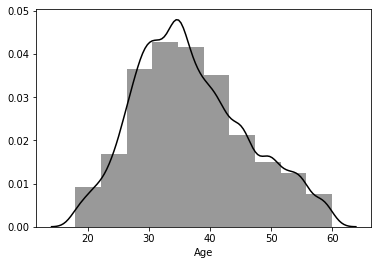

In [173]:
sns.distplot(df['Age'],hist=True,kde=True,color='k',bins=10)

In [14]:

# Majority of employees lie between the age range of 30 to 40

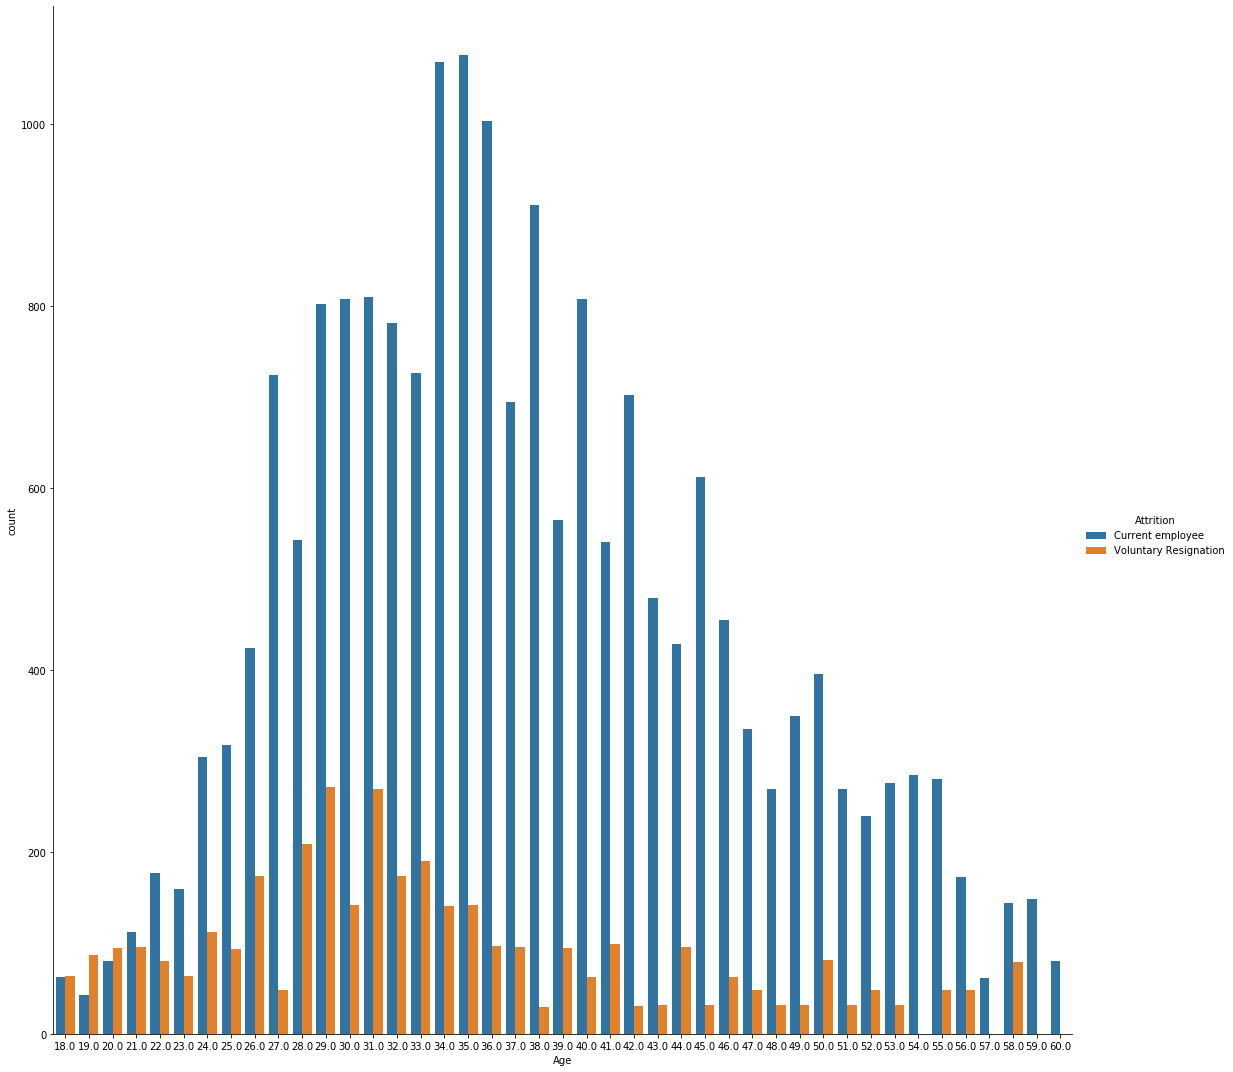

In [174]:

sns.catplot(x='Age',hue='Attrition',data=df,kind='count',height=15)

In [175]:
# Majority of attritions can be seen in 28 to 33 age group range

# Attrition - Target Variable

In [176]:

df['Attrition'].value_counts()

Current employee         19527
Voluntary Resignation     3663
Name: Attrition, dtype: int64

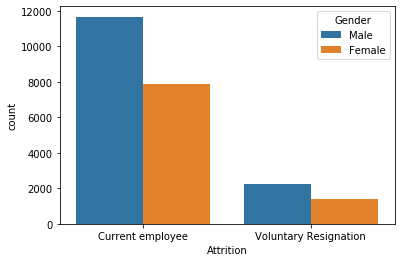

In [177]:

sns.countplot(x='Attrition',data=df,hue='Gender')

In [178]:
# Count of male employees are more in case of attrition

# Business Travel

In [179]:
df['BusinessTravel'].value_counts()

Travel_Rarely        16443
Travel_Frequently     4376
Non-Travel            2371
Name: BusinessTravel, dtype: int64

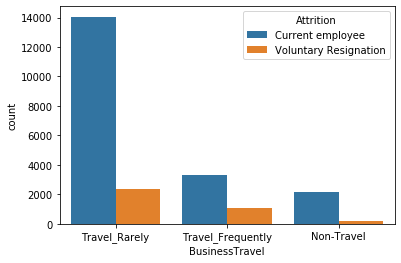

In [180]:
sns.countplot(x='BusinessTravel',data=df,hue='Attrition')

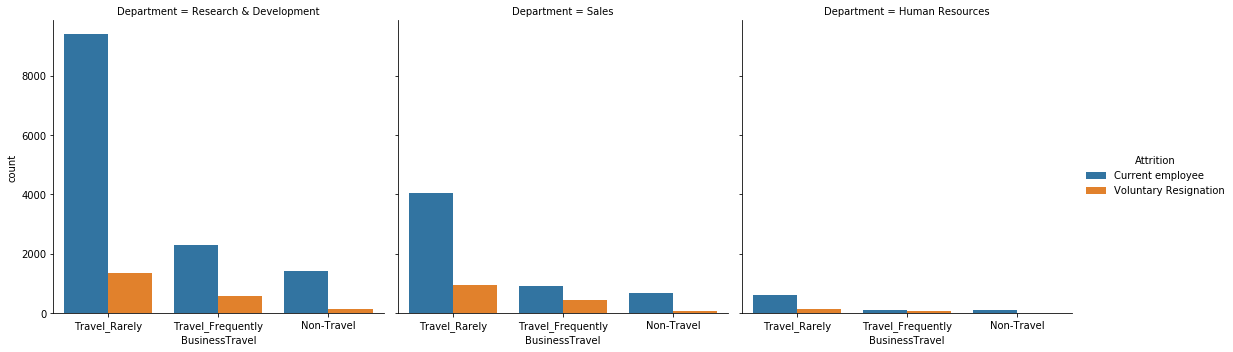

In [181]:
sns.catplot(x='BusinessTravel',data=df,hue='Attrition',col='Department',kind='count',height=5)

In [182]:

# Wrt all the departments we can conclude that 'Travel_Frequently Business Travel' are in the verge towards attrition for HR Dept.

# Daily Rate

In [183]:
df['DailyRate'].value_counts()

691.0     99
408.0     80
1329.0    80
329.0     79
530.0     78
          ..
573.0     14
452.0     14
363.0     14
1122.0    14
776.0     14
Name: DailyRate, Length: 883, dtype: int64

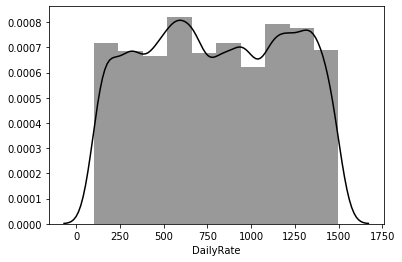

In [184]:

sns.distplot(df['DailyRate'],bins=10,color='k')

In [185]:
df['DailyRate'].mean()

802.2463130659767

In [186]:
 df['DailyRate'].min()

102.0

In [187]:
df['DailyRate'].max()

1499.0

In [188]:
# The average of daily rate is somewhere around 802,minimum is 102,and maximum is 1499.

# Department

In [189]:
df['Department'].value_counts()

Research & Development    15125
Sales                      7056
Human Resources            1009
Name: Department, dtype: int64

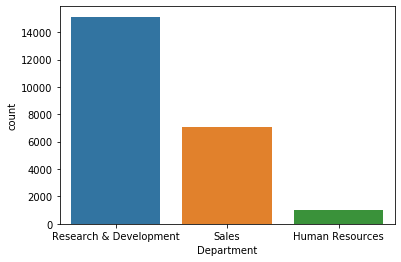

In [190]:
sns.countplot(df['Department'])

In [191]:

# Around 60% employees are working in R&D Department

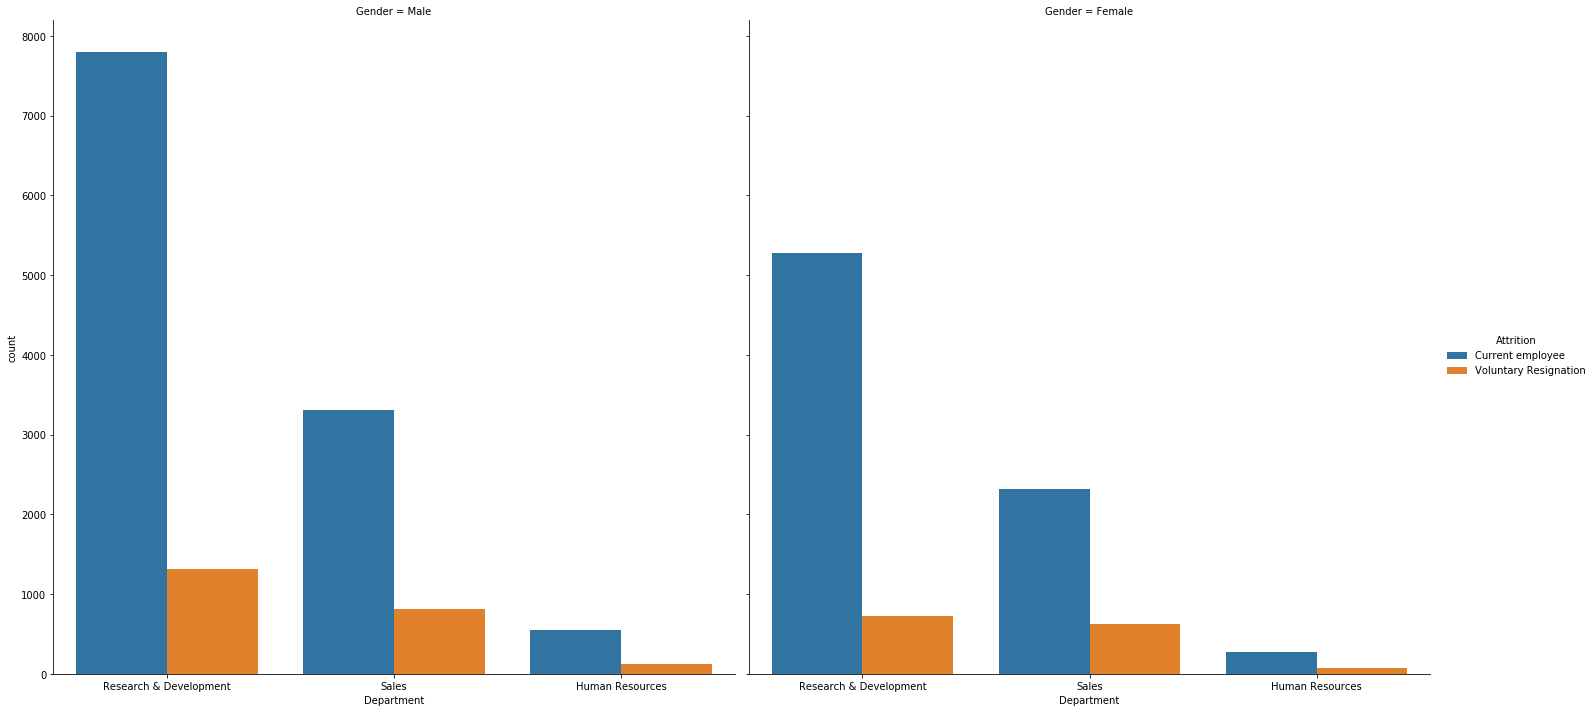

In [192]:
sns.catplot(x='Department',hue='Attrition',col='Gender',data=df,kind='count',height=10)

In [193]:
# Sales department has a high attrition rate

# DistanceFromHome

In [194]:
df['DistanceFromHome'].value_counts()

1       2380
2       2063
2.0     1239
3       1022
10       978
7        967
9        952
8        925
1.0      897
5        803
4        694
6        681
10.0     381
9.0      373
7.0      363
16       353
8.0      345
11       335
23       324
3.0      324
24       320
4.0      320
15       295
18       287
13       272
6.0      257
19       255
25       250
21       238
20       238
29       238
17       223
5.0      220
22       219
26.0     217
28       207
12       193
29.0     191
14       190
26       178
28.0     156
16.0     147
27       147
14.0     143
25.0     140
12.0     137
20.0     137
18.0     131
11.0     126
15.0     121
24.0     110
23.0     104
19.0      96
22.0      85
17.0      77
27.0      47
21.0      47
13.0      32
Name: DistanceFromHome, dtype: int64

In [195]:

# As from info it is observed that 'Distance From Home' is object type,so we converted it to numeric type

In [196]:
df['DistanceFromHome']=pd.to_numeric(df['DistanceFromHome'],errors='coerce')

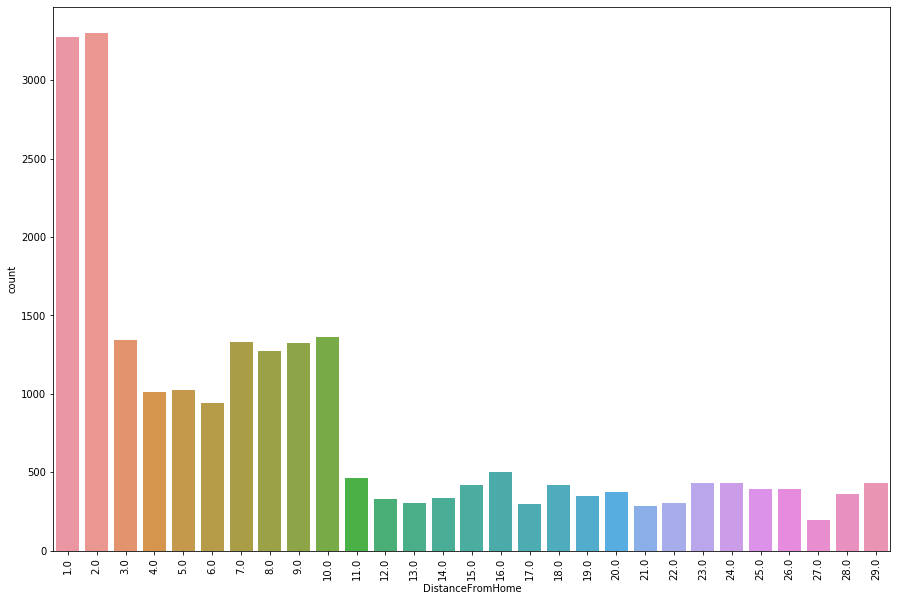

In [197]:
plt.figure(figsize=(15,10))
plt.xticks(rotation='vertical')
sns.countplot(df['DistanceFromHome'])

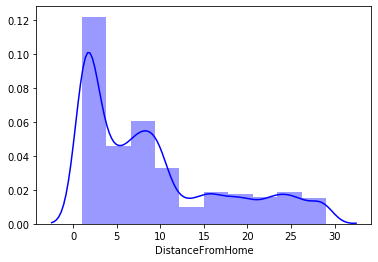

In [198]:
sns.distplot(df['DistanceFromHome'],color='blue',bins=10)

In [199]:
# From the above count plot we can see that there are multiple instances of some numbers in int and float,so we will convert all to a single datatype

In [200]:
df['DistanceFromHome']=df['DistanceFromHome'].astype('int')

In [201]:
df['DistanceFromHome'].value_counts()

2     3302
1     3277
10    1359
3     1346
7     1330
9     1325
8     1270
5     1023
4     1014
6      938
16     500
11     461
24     430
29     429
23     428
18     418
15     416
26     395
25     390
20     375
28     363
19     351
14     333
12     330
22     304
13     304
17     300
21     285
27     194
Name: DistanceFromHome, dtype: int64

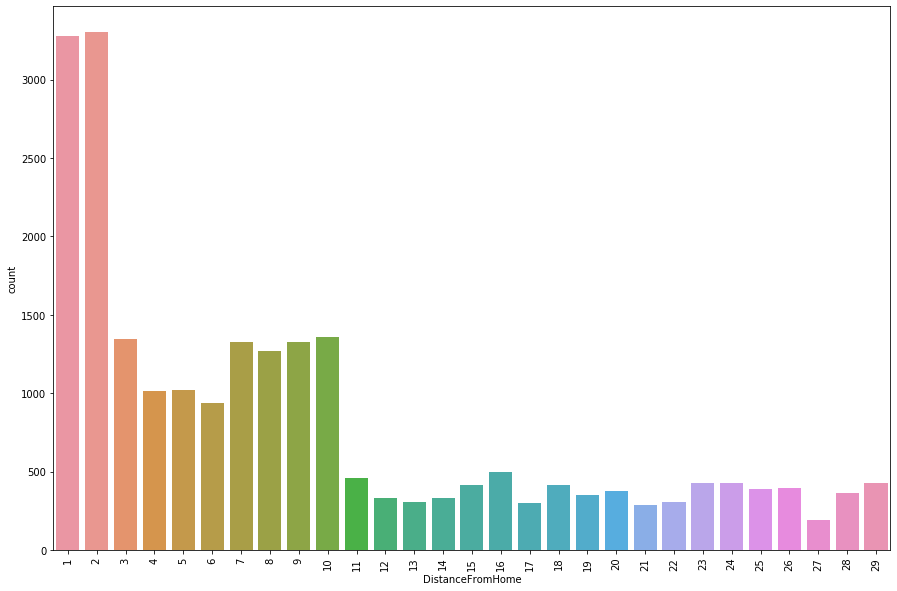

In [202]:
plt.figure(figsize=(15,10))
plt.xticks(rotation='vertical')
sns.countplot(df['DistanceFromHome'])

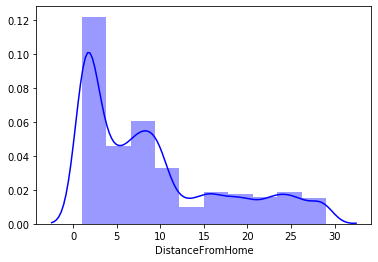

In [203]:

sns.distplot(df['DistanceFromHome'],color='b',bins=10)

In [204]:
df['DistanceFromHome'].mean()

9.188486416558861

In [205]:
df['DistanceFromHome'].min()

1

In [206]:
df['DistanceFromHome'].max()

29

In [207]:
# We can see that the avg distance from home is around 9Km, minimum is 1Km and maximum is 29Km.

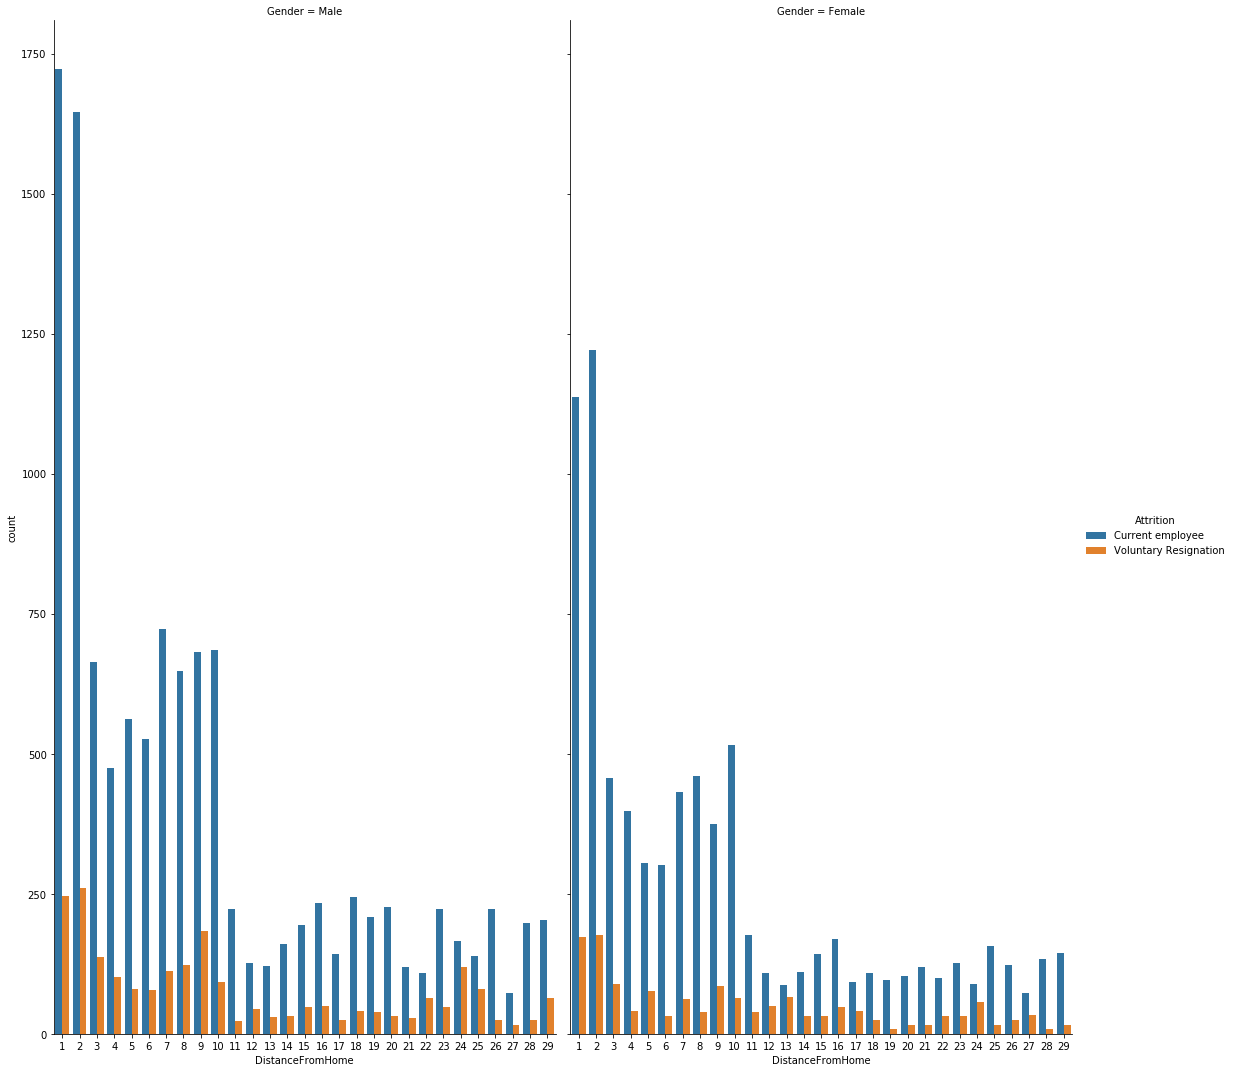

In [208]:
sns.catplot(x='DistanceFromHome',hue='Attrition',col='Gender',data=df,kind='count',height=15,aspect=0.5)

In [209]:
# in case of both male and female,attrition rate tends to be higher when the distance exceed 10Km.

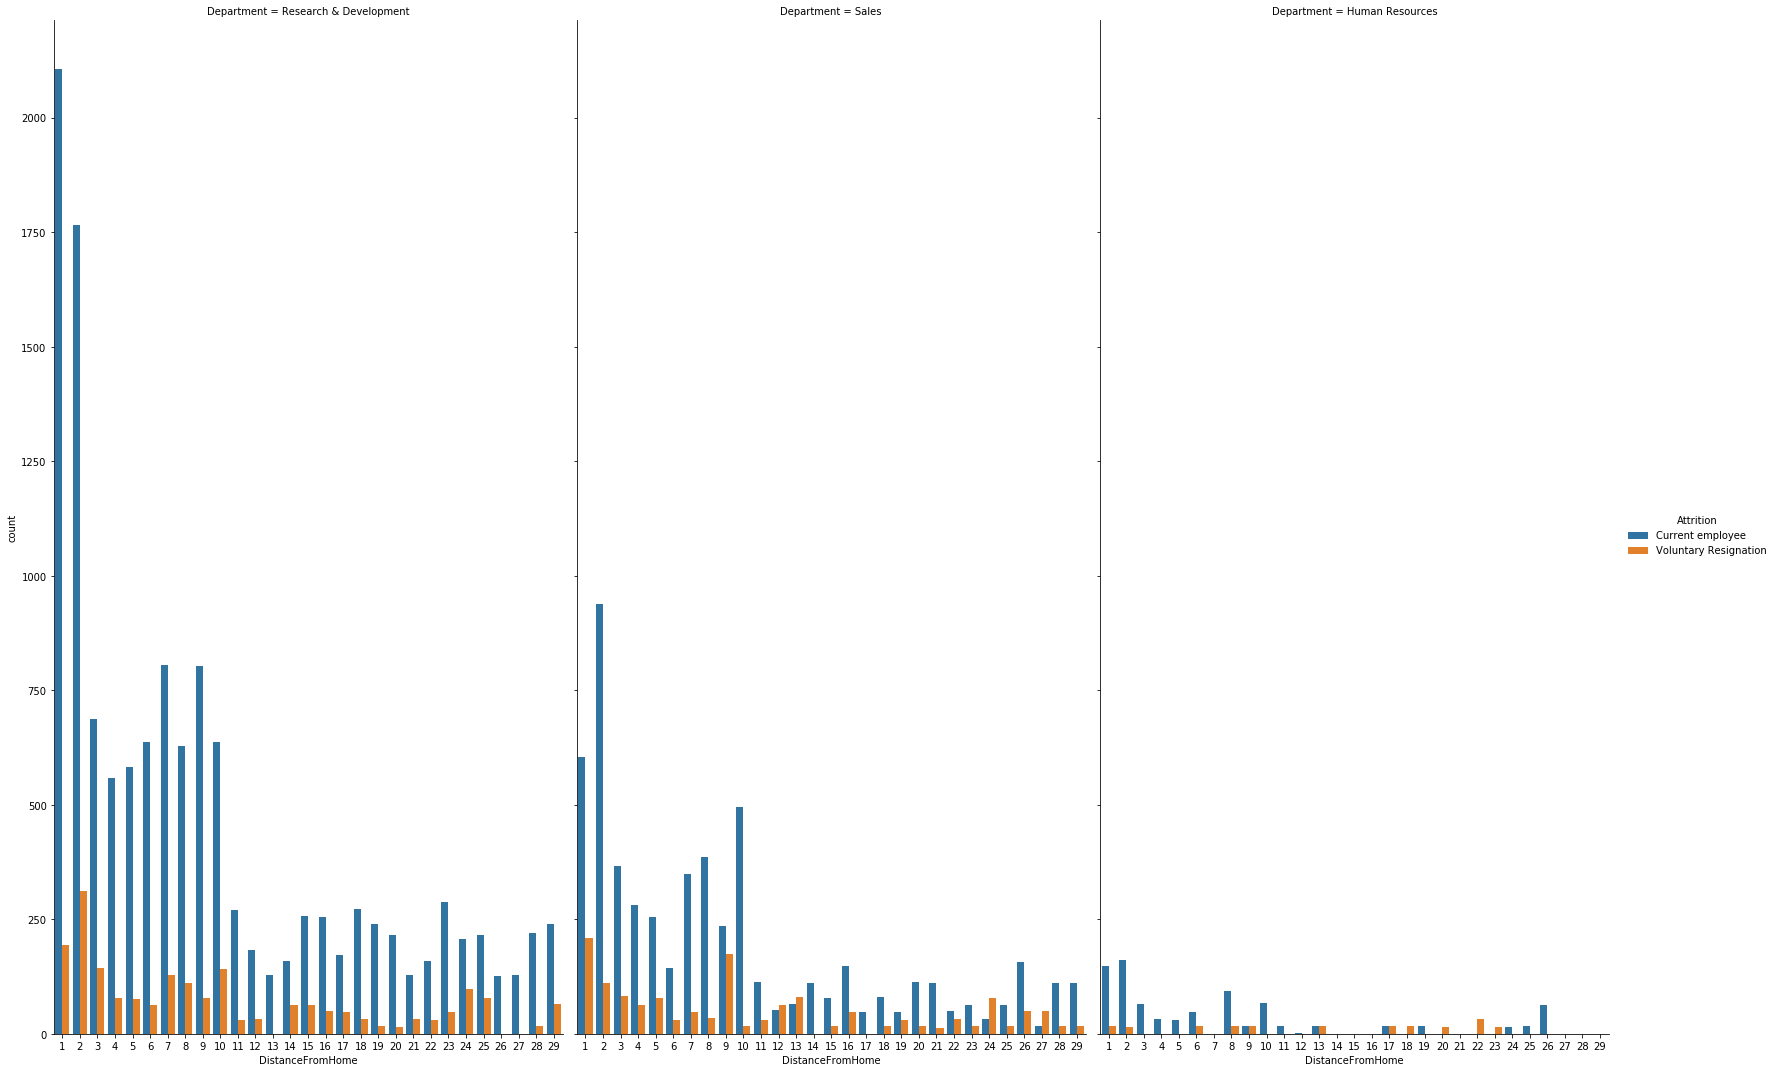

In [210]:

sns.catplot(x='DistanceFromHome',hue='Attrition',col='Department',data=df,kind='count',height=15,aspect=0.5)

In [211]:
 #In case of all departments,attrition rate tends to be higher when the distance exceed 10Km.

# Education

In [212]:
df['Education'].value_counts()

3.0    9006
4.0    6256
2.0    4472
1.0    2703
5.0     753
Name: Education, dtype: int64

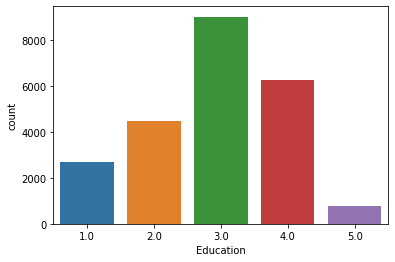

In [213]:
sns.countplot(df['Education'])

In [214]:
# Around 30% of employees have education level of 3

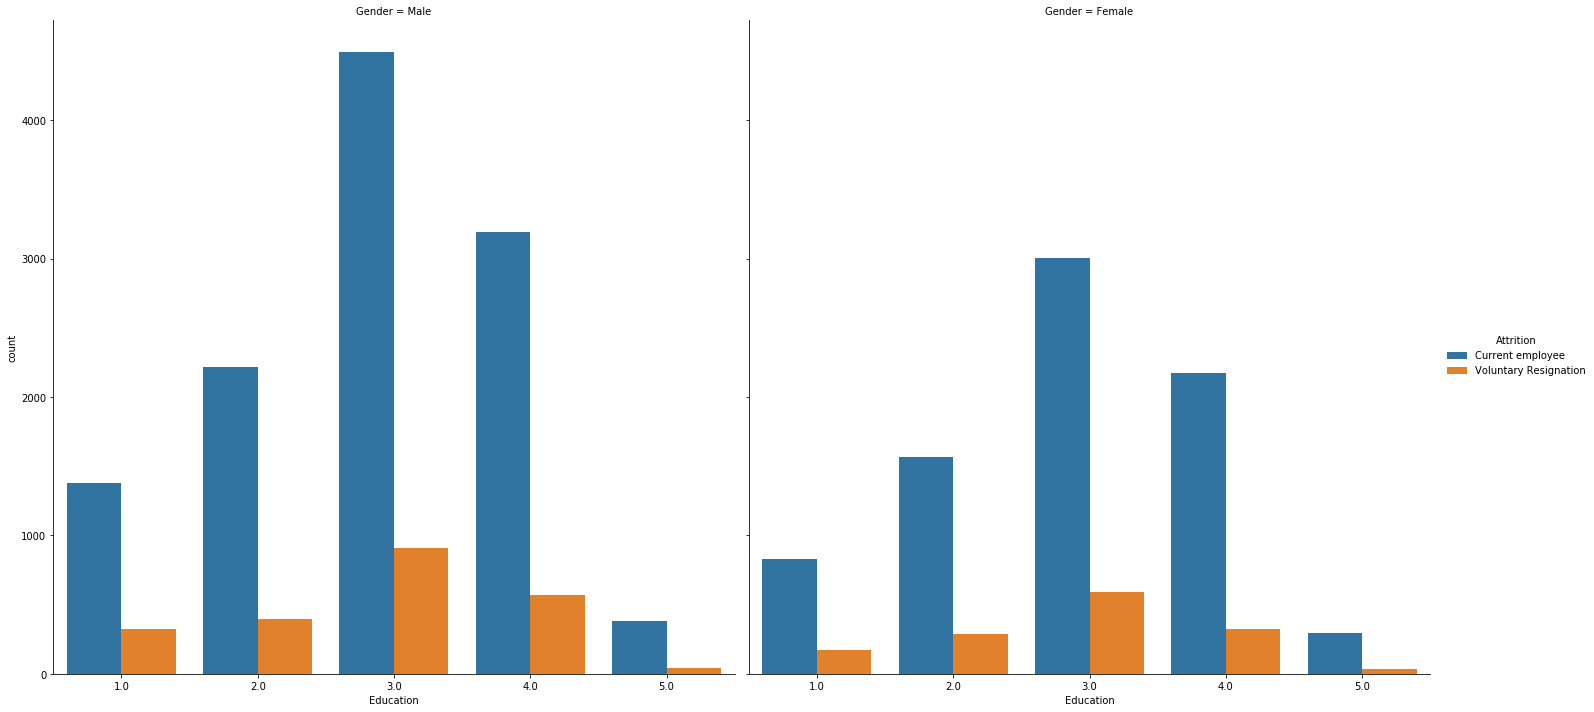

In [215]:
sns.catplot(x='Education',hue='Attrition',col='Gender',data=df,kind='count',height=10)

In [216]:
# For both male and female,attrition rate is higher for education level 1,2 and 3.

# EducationField

In [217]:
df['EducationField'].value_counts()

Life Sciences       9571
Medical             7296
Marketing           2524
Technical Degree    2053
Other               1304
Human Resources      441
Test                   1
Name: EducationField, dtype: int64

In [218]:
# As there is only 1 count in 'Test' category,so we will impute it in 'Other' category.

In [219]:
df.loc[df['EducationField']=='Test','EducationField']='Other'

In [220]:
df['EducationField'].value_counts()

Life Sciences       9571
Medical             7296
Marketing           2524
Technical Degree    2053
Other               1305
Human Resources      441
Name: EducationField, dtype: int64

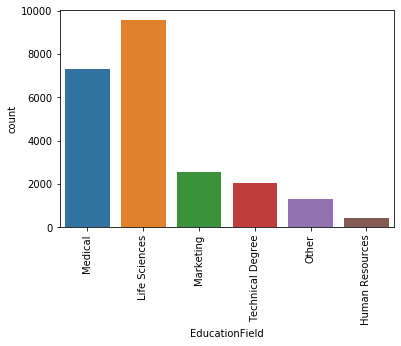

In [221]:
plt.xticks(rotation='vertical')
sns.countplot(df['EducationField'])

In [222]:
# Around 70% of employees are having 'Life Sciences' and 'Medical' education field.

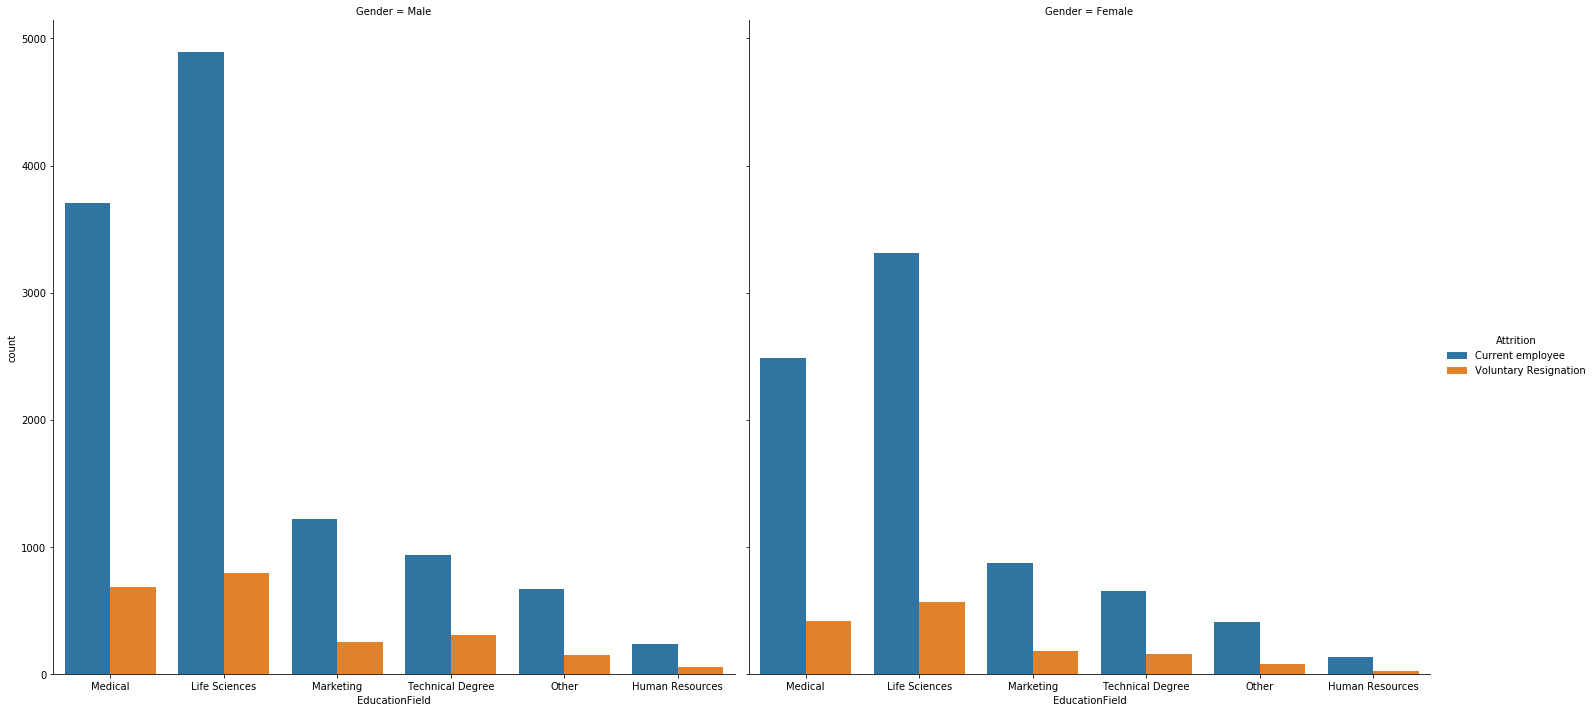

In [223]:
sns.catplot(x='EducationField',hue='Attrition',col='Gender',data=df,kind='count',height=10)

In [224]:

# Attrition rate of female in 'HR' education field is less when compared to male,
# Attrition rate of female in 'Life Sciences' and 'Medical' is more when compared to male.

# EmployeeCount

In [225]:
df['EmployeeCount'].value_counts()

1    16227
1     6963
Name: EmployeeCount, dtype: int64

# EmployeeNumber

In [226]:
df['EmployeeNumber'].value_counts()

23244    6
10442    5
6325     5
35       4
9568     4
        ..
18553    1
22210    1
12345    1
22107    1
5373     1
Name: EmployeeNumber, Length: 23141, dtype: int64

# Application ID

In [227]:
df['Application ID'].value_counts()

129752    1
128240    1
140069    1
141316    1
146129    1
         ..
134389    1
128284    1
125979    1
132168    1
131742    1
Name: Application ID, Length: 23190, dtype: int64

# EnvironmentSatisfaction

In [228]:
df['EnvironmentSatisfaction'].value_counts()

3.0    7142
4.0    7038
1.0    4524
2.0    4486
Name: EnvironmentSatisfaction, dtype: int64

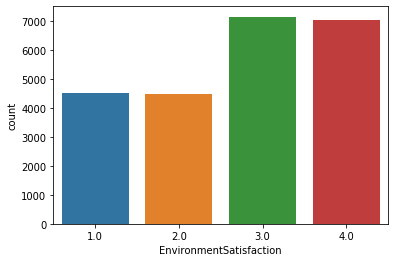

In [229]:
sns.countplot(df['EnvironmentSatisfaction'])

In [230]:

# Count of environment satisfaction is more towards 3 and 4.

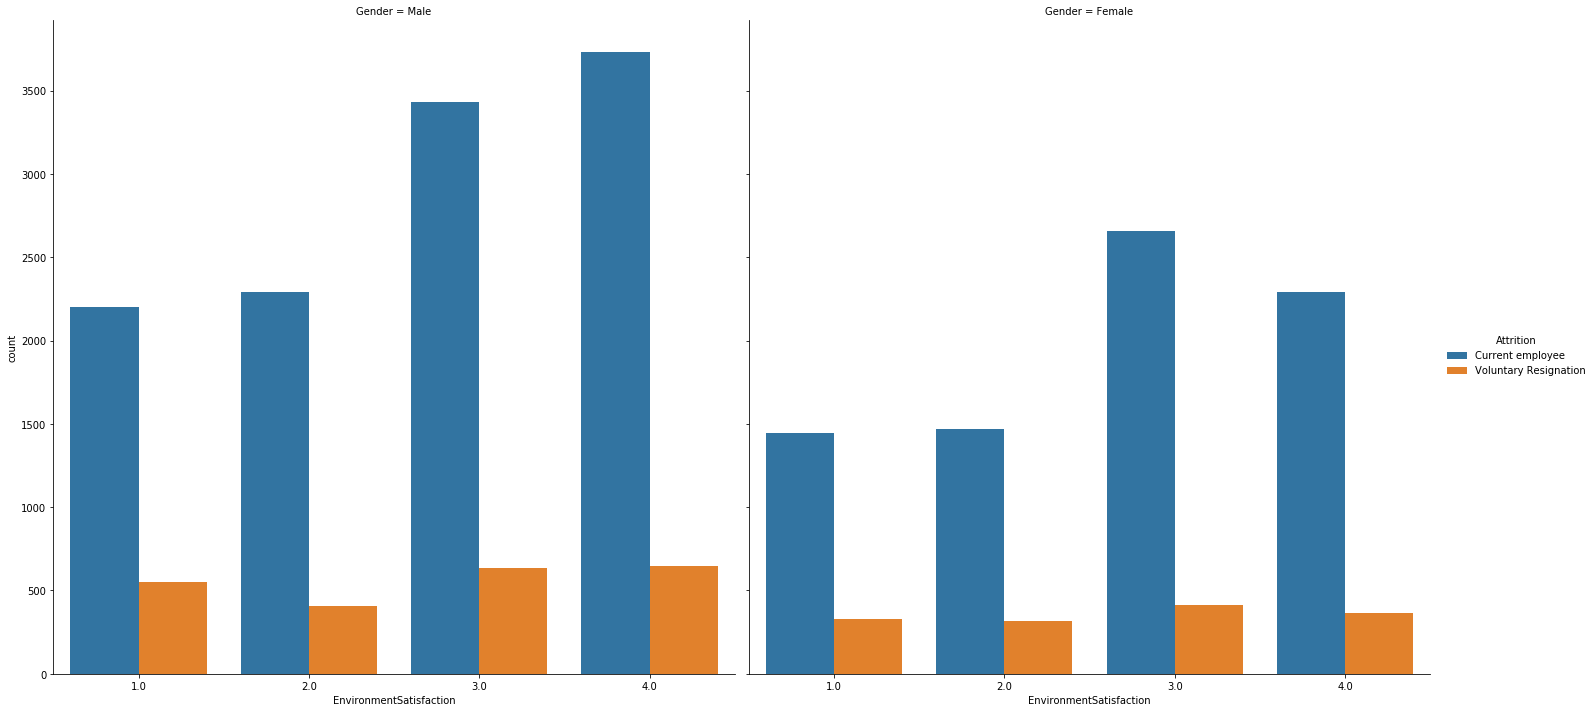

In [231]:
sns.catplot(x='EnvironmentSatisfaction',hue='Attrition',col='Gender',data=df,kind='count',height=10)

In [232]:
# For both male and female, attrition rate is high environment satisfaction is 1 and 2

# Gender

In [233]:
df['Gender'].value_counts()

Male      13907
Female     9283
Name: Gender, dtype: int64

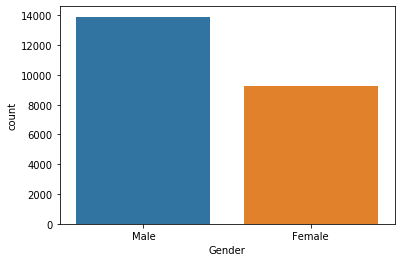

In [234]:

sns.countplot(df['Gender'])

In [235]:
# Approximately female and male ratio is 3:2

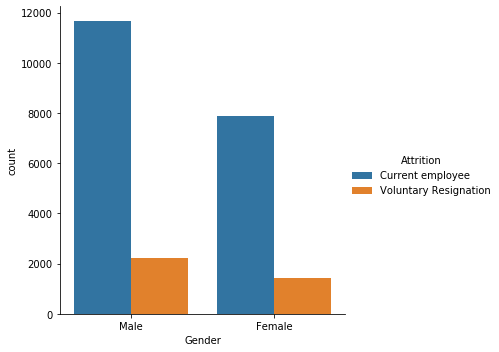

In [236]:

sns.catplot(x='Gender',hue='Attrition',kind='count',data=df,height=5)

In [237]:

# For better inference, lets calculate male and female attrition rate.

In [238]:
df.loc[(df['Gender']=='Female') & (df['Attrition']=='Voluntary Resignation')]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,Application ID,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
14178,35.0,Voluntary Resignation,Travel_Frequently,662.0,Sales,18,4.0,Marketing,1,15724,139179,4.0,Female,67,3.0,2.0,Sales Executive,3,Married,4614,23288.0,0.0,Y,Yes,18,3.0,3.0,80.0,1.0,5.0,0.0,2.0,4.0,2.0,3.0,2.0,Company Website
7203,28.0,Voluntary Resignation,Travel_Rarely,654.0,Research & Development,1,2.0,Life Sciences,1,8688,132143,1.0,Female,67,1.0,1.0,Research Scientist,2,Single,2216,3872.0,2.0,Y,Yes,13,3.0,4.0,80.0,0.0,10.0,4.0,3.0,7.0,7.0,3.0,7.0,Indeed
17629,45.0,Voluntary Resignation,Travel_Rarely,1449.0,Sales,2,3.0,Marketing,1,14627,138082,1.0,Female,94,1.0,5.0,Manager,2,Single,18824,2493.0,2.0,Y,Yes,16,3.0,1.0,80.0,0.0,26.0,2.0,3.0,24.0,10.0,1.0,11.0,GlassDoor
7215,28.0,Voluntary Resignation,Travel_Rarely,1475.0,Sales,13,2.0,Medical,1,12473,135928,3.0,Female,72,2.0,1.0,Laboratory Technician,1,Single,1416,17258.0,1.0,Y,No,13,3.0,1.0,80.0,0.0,1.0,6.0,2.0,1.0,0.0,1.0,0.0,LinkedIn
17459,21.0,Voluntary Resignation,Travel_Frequently,251.0,Research & Development,10,2.0,Medical,1,14668,138123,1.0,Female,45,2.0,1.0,Laboratory Technician,3,Single,2625,25308.0,1.0,Y,No,20,3.0,3.0,80.0,0.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,Indeed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,34.0,Voluntary Resignation,Travel_Rarely,1107.0,Human Resources,9,4.0,Medical,1,16638,140093,1.0,Female,52,3.0,1.0,Human Resources,3,Married,2742,3072.0,0.0,Y,No,15,3.0,4.0,80.0,0.0,2.0,0.0,3.0,2.0,2.0,2.0,2.0,GlassDoor
10089,27.0,Voluntary Resignation,Travel_Rarely,1420.0,Sales,2,1.0,Life Sciences,1,11088,134543,3.0,Female,67,3.0,2.0,Healthcare Representative,4,Married,5855,17369.0,0.0,Y,Yes,11,3.0,3.0,80.0,2.0,10.0,2.0,1.0,9.0,7.0,8.0,5.0,Company Website
10105,27.0,Voluntary Resignation,Travel_Frequently,1337.0,Human Resources,22,3.0,Other,1,22060,145515,1.0,Female,32,2.0,1.0,Human Resources,2,Married,2863,19555.0,0.0,Y,No,12,3.0,1.0,80.0,0.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0,Indeed
1456,18.0,Voluntary Resignation,Travel_Rarely,230.0,Research & Development,3,3.0,Life Sciences,1,2494,125949,1.0,Female,44,3.0,2.0,Research Scientist,2,Divorced,5605,8504.0,1.0,Y,No,11,3.0,1.0,80.0,1.0,20.0,2.0,3.0,20.0,7.0,2.0,13.0,Seek


In [239]:
Female_Attrition_Rate=1420/9283
Female_Attrition_Rate

0.1529677905849402

In [240]:
df.loc[(df['Gender']=='Male') & (df['Attrition']=='Voluntary Resignation')]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,Application ID,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
16292,58.0,Voluntary Resignation,Travel_Frequently,781.0,Research & Development,2,1.0,Life Sciences,1,10606,134061,4.0,Male,57,2.0,1.0,Laboratory Technician,4,Divorced,2380,13384.0,1.0,Y,Yes,14,3.0,4.0,80.0,1.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0,LinkedIn
17622,45.0,Voluntary Resignation,Travel_Rarely,1449.0,Sales,2,3.0,Marketing,1,11792,135247,3.0,Male,70,2.0,3.0,Healthcare Representative,3,Single,10999,22245.0,7.0,Y,No,14,3.0,2.0,80.0,0.0,27.0,3.0,3.0,15.0,11.0,4.0,8.0,Jora
5965,20.0,Voluntary Resignation,Travel_Frequently,769.0,Sales,9,3.0,Marketing,1,11564,135019,3.0,Male,69,3.0,4.0,Manufacturing Director,3,Married,13973,4161.0,3.0,Y,Yes,18,4.0,4.0,80.0,1.0,22.0,2.0,3.0,12.0,11.0,1.0,5.0,GlassDoor
18276,38.0,Voluntary Resignation,Travel_Rarely,903.0,Research & Development,2,3.0,Life Sciences,1,17805,141260,3.0,Male,81,3.0,2.0,Manufacturing Director,2,Married,4855,7653.0,1.0,Y,No,11,3.0,1.0,80.0,2.0,7.0,2.0,3.0,5.0,2.0,1.0,4.0,Jora
15453,33.0,Voluntary Resignation,Travel_Rarely,1017.0,Research & Development,25,3.0,Technical Degree,1,12812,136267,1.0,Male,55,2.0,1.0,Research Scientist,2,Single,2313,2993.0,4.0,Y,Yes,20,4.0,2.0,80.0,0.0,5.0,0.0,3.0,2.0,2.0,2.0,2.0,Company Website
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10992,32.0,Voluntary Resignation,Non-Travel,1474.0,Sales,11,4.0,Medical,1,20432,143887,4.0,Male,93,3.0,3.0,Healthcare Representative,1,Married,8321,25949.0,0.0,Y,Yes,13,3.0,4.0,80.0,1.0,15.0,1.0,3.0,12.0,8.0,5.0,7.0,Company Website
13984,19.0,Voluntary Resignation,Travel_Rarely,303.0,Research & Development,2,3.0,Life Sciences,1,2916,126371,1.0,Male,47,2.0,1.0,Laboratory Technician,4,Single,1102,3809.0,1.0,Y,No,22,4.0,3.0,80.0,0.0,1.0,3.0,2.0,1.0,0.0,1.0,0.0,Seek
16482,47.0,Voluntary Resignation,Non-Travel,666.0,Research & Development,29,4.0,Technical Degree,1,2326,125781,1.0,Male,43,3.0,2.0,Human Resources,4,Married,6347,13982.0,0.0,Y,Yes,19,3.0,4.0,80.0,0.0,12.0,2.0,1.0,11.0,9.0,4.0,7.0,Seek
3931,30.0,Voluntary Resignation,Travel_Frequently,464.0,Research & Development,4,3.0,Technical Degree,1,6235,129690,3.0,Male,40,3.0,1.0,Research Scientist,4,Single,2285,3427.0,9.0,Y,Yes,23,4.0,3.0,80.0,0.0,3.0,4.0,3.0,1.0,0.0,0.0,0.0,Jora


In [241]:
Male_Attrition_Rate=2243/13907
Male_Attrition_Rate

0.16128568346875674

In [242]:
# Hence, Male attrition rate is slightly higher than Female attrition rate.

# HourlyRate

In [243]:
df['HourlyRate'].value_counts()

66    478
84    441
48    440
42    439
96    434
     ... 
69    235
68    220
53    218
38    206
34    189
Name: HourlyRate, Length: 71, dtype: int64

In [244]:
# From info we can see that HourlyRate has dtype as object, so lets convert it in integer form

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23190 entries, 2259 to 5923
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23190 non-null  float64
 1   Attrition                 23190 non-null  object 
 2   BusinessTravel            23190 non-null  object 
 3   DailyRate                 23190 non-null  float64
 4   Department                23190 non-null  object 
 5   DistanceFromHome          23190 non-null  int32  
 6   Education                 23190 non-null  float64
 7   EducationField            23190 non-null  object 
 8   EmployeeCount             23190 non-null  object 
 9   EmployeeNumber            23190 non-null  object 
 10  Application ID            23190 non-null  object 
 11  EnvironmentSatisfaction   23190 non-null  float64
 12  Gender                    23190 non-null  object 
 13  HourlyRate                23190 non-null  object 
 14  JobI

In [246]:
df['HourlyRate']=df['HourlyRate'].astype('int')

In [247]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23190 entries, 2259 to 5923
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23190 non-null  float64
 1   Attrition                 23190 non-null  object 
 2   BusinessTravel            23190 non-null  object 
 3   DailyRate                 23190 non-null  float64
 4   Department                23190 non-null  object 
 5   DistanceFromHome          23190 non-null  int32  
 6   Education                 23190 non-null  float64
 7   EducationField            23190 non-null  object 
 8   EmployeeCount             23190 non-null  object 
 9   EmployeeNumber            23190 non-null  object 
 10  Application ID            23190 non-null  object 
 11  EnvironmentSatisfaction   23190 non-null  float64
 12  Gender                    23190 non-null  object 
 13  HourlyRate                23190 non-null  int32  
 14  JobI

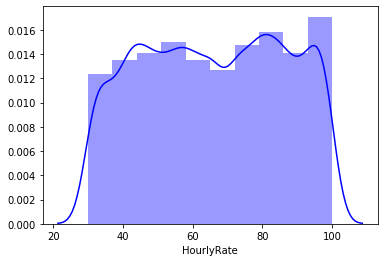

In [248]:
sns.distplot(df['HourlyRate'],color='b',bins=10)

In [249]:

df['HourlyRate'].mean()

65.85774040534713

In [250]:

df['HourlyRate'].min()

30

In [251]:

df['HourlyRate'].max()

100

In [252]:
# Avg hourly rate is around 65 and min hourly rate is 65 and max hourly rate is 100


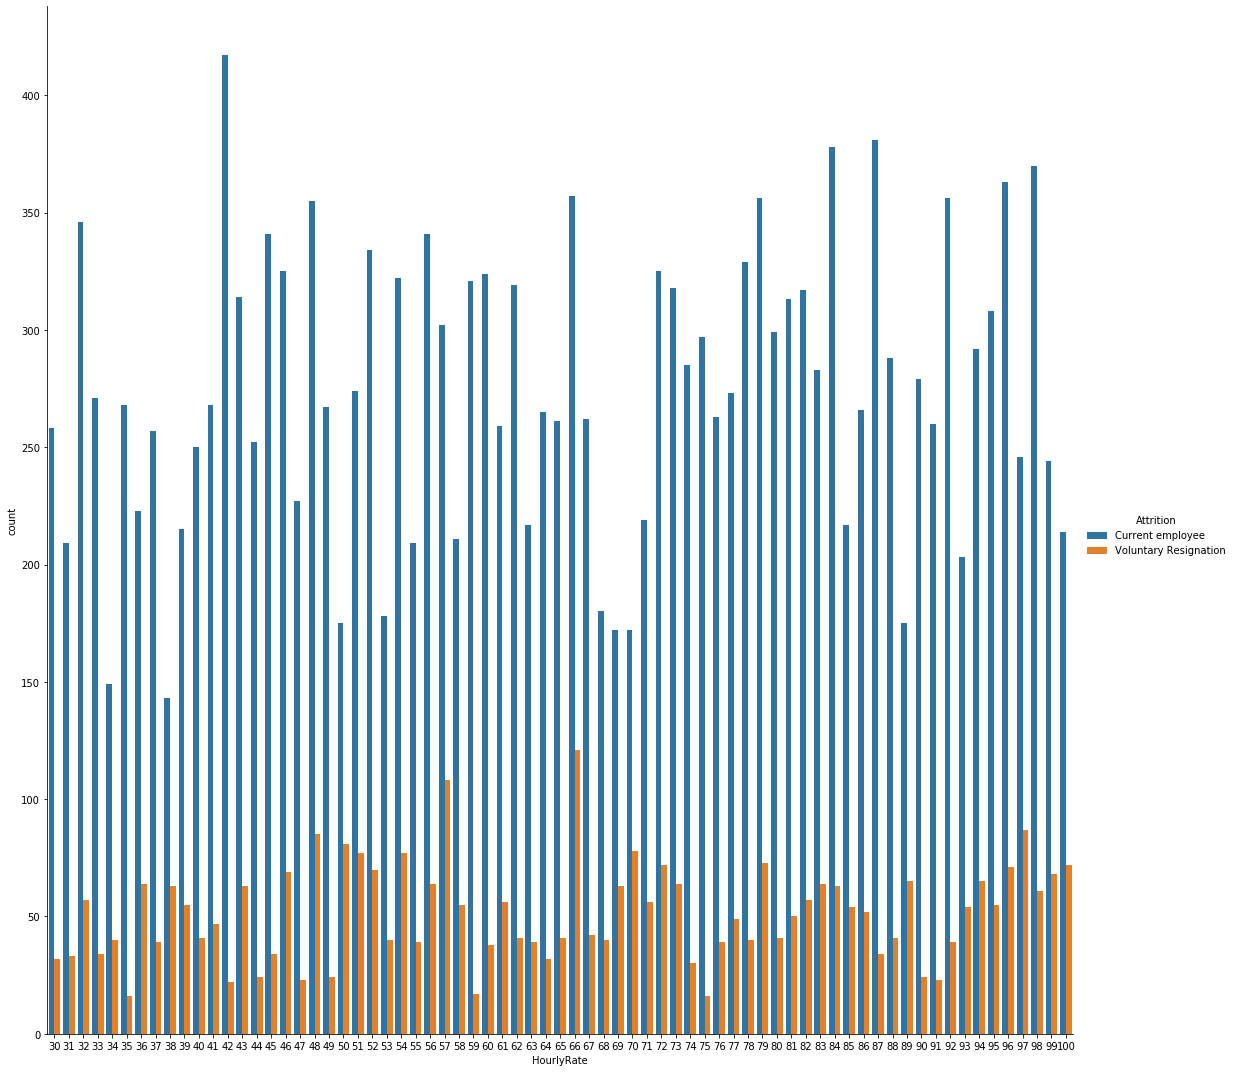

In [253]:

sns.catplot(x='HourlyRate',hue='Attrition',kind='count',data=df,height=15,aspect=1)

In [254]:
# There is no clear evidence that HourlyRate has any impact on attrition of employees.

# JobInvolvement

In [255]:
df['JobInvolvement'].value_counts()

3.0    13723
2.0     5903
4.0     2261
1.0     1303
Name: JobInvolvement, dtype: int64

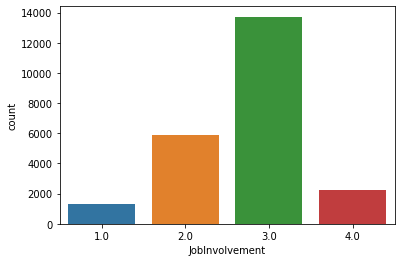

In [256]:
sns.countplot(df['JobInvolvement'])

In [257]:

# Majority of employees lie in the job involvement 2 and 3

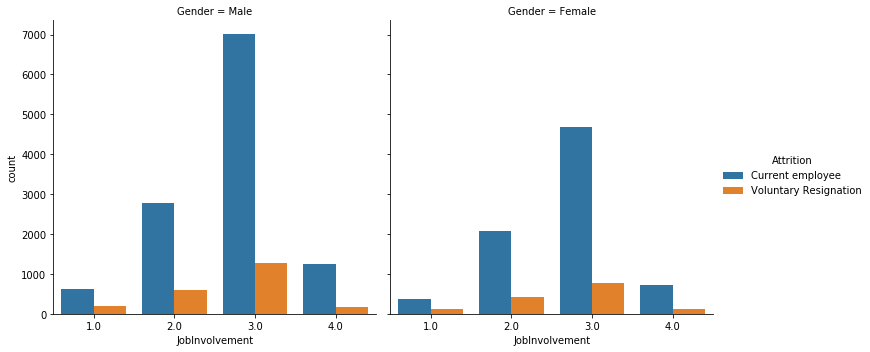

In [258]:
sns.catplot(x='JobInvolvement',hue='Attrition',col='Gender',data=df,kind='count')

In [259]:
# Job involvement 3 has slighly more attrition rate than others.

# JobLevel

In [260]:
df['JobLevel'].value_counts()

1.0    8542
2.0    8438
3.0    3445
4.0    1682
5.0    1083
Name: JobLevel, dtype: int64

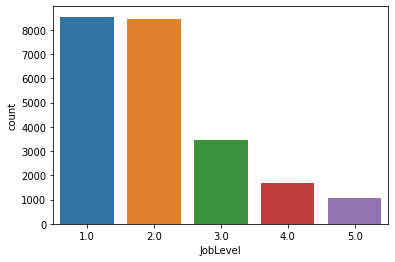

In [261]:
sns.countplot(df['JobLevel'])

In [262]:
# Majority of employees lie in the job level 1 and 2

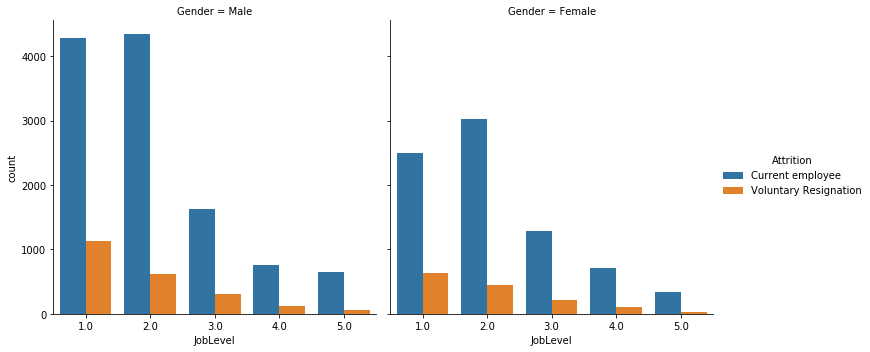

In [263]:
sns.catplot(x='JobLevel',hue='Attrition',col='Gender',data=df,kind='count')

In [264]:
# Attrition rate is higher in job level 1 and 2.

# JobRole

In [265]:

df['JobRole'].value_counts()

Sales Executive              5057
Research Scientist           4592
Laboratory Technician        4100
Manufacturing Director       2361
Healthcare Representative    2077
Manager                      1585
Sales Representative         1299
Research Director            1281
Human Resources               838
Name: JobRole, dtype: int64

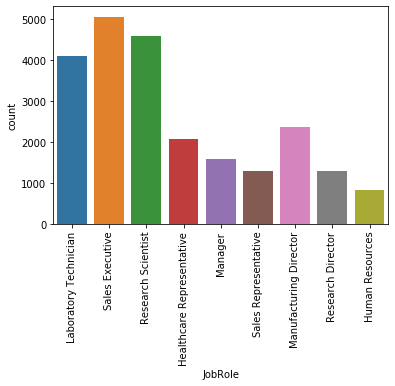

In [266]:
plt.xticks(rotation='vertical')
sns.countplot(df['JobRole'])

In [267]:
# Count of employees is more in job role as Sales Executive,Laboratory Technician,Research Scientist

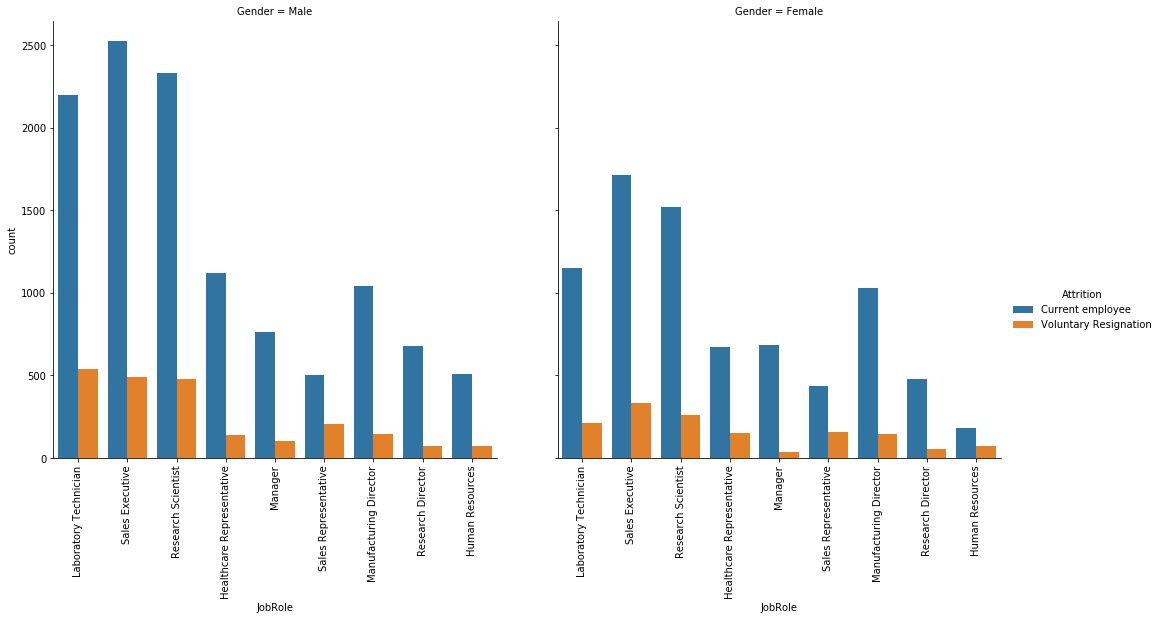

In [268]:
g=sns.catplot(x='JobRole',hue='Attrition',col='Gender',data=df,kind='count',height=7)
g.set_xticklabels(rotation=90)

In [269]:
# Job role as Sales Representative has the highest attrition rate for both male and female,
# Job role as HR has high rate of attrition in case of female gender.


# JobSatisfaction

In [270]:
df['JobSatisfaction'].value_counts()

4    7209
3    7019
1    4560
2    4402
Name: JobSatisfaction, dtype: int64

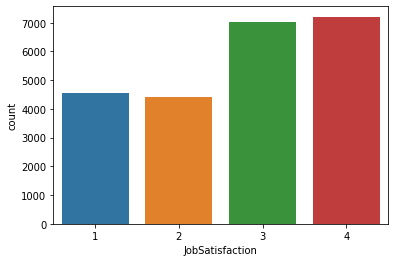

In [271]:
sns.countplot(df['JobSatisfaction'])

In [272]:
# Job Satisfaction count for 3 and 4 are more than 1 and 2.

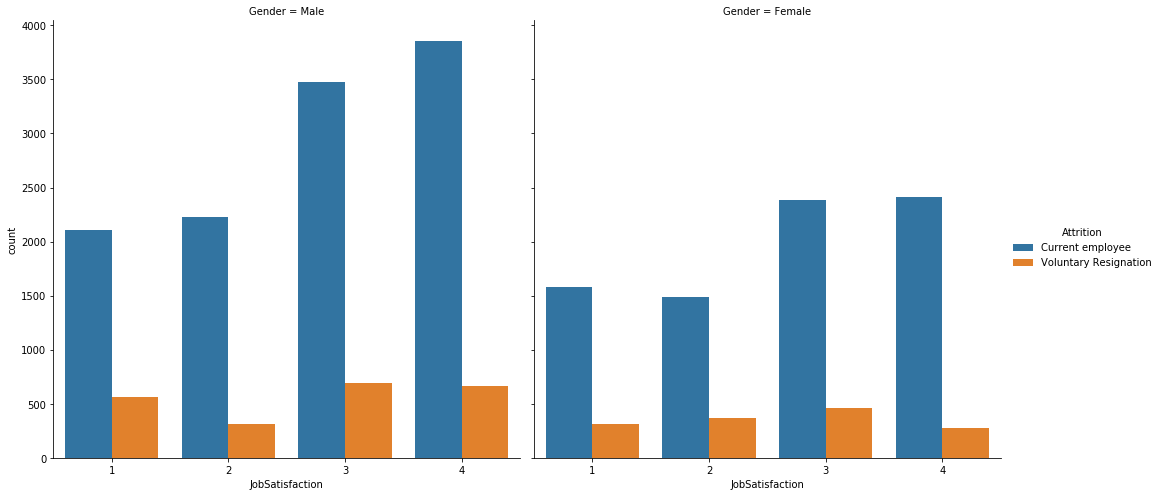

In [273]:

sns.catplot(x='JobSatisfaction',hue='Attrition',col='Gender',data=df,kind='count',height=7)

In [274]:

# Higher attrition rate can be seen in Job Satisfaction level 1 and 2.

# MaritalStatus

In [275]:
df['MaritalStatus'].value_counts()

Married     10613
Single       7411
Divorced     5166
Name: MaritalStatus, dtype: int64

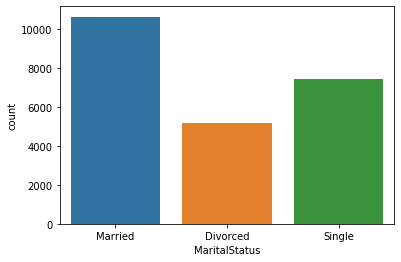

In [276]:

sns.countplot(df['MaritalStatus'])

In [277]:

# Count of married employees is more

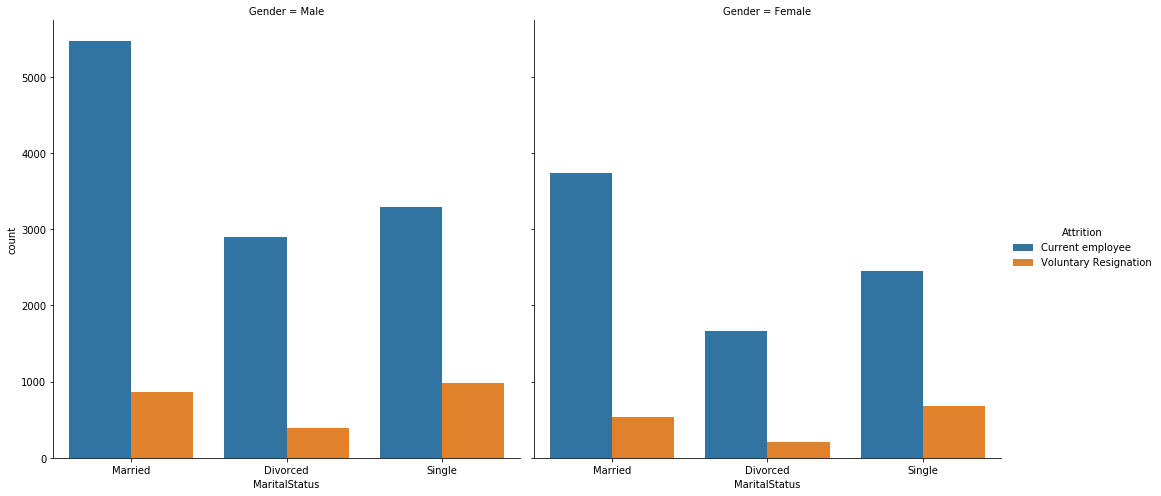

In [278]:
sns.catplot(x='MaritalStatus',hue='Attrition',col='Gender',data=df,kind='count',height=7)

In [279]:
# Attrition rate in singles are higher for both male and female

# MonthlyIncome

In [280]:
df['MonthlyIncome'].value_counts()

2342     66
2559     54
2741     48
6347     48
5562     48
         ..
2018      8
5980      8
7260      8
19658     8
4559      7
Name: MonthlyIncome, Length: 1349, dtype: int64

In [281]:
# As,monthly income column has object dtype, we need to convert it in integer form.

In [282]:

df['MonthlyIncome']=df['MonthlyIncome'].astype('int')


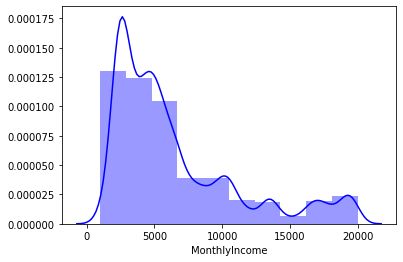

In [283]:

sns.distplot(df['MonthlyIncome'],bins=10,color='b')

In [284]:
df['MonthlyIncome'].mean()

6507.905519620526

In [285]:
df['MonthlyIncome'].min()

1009

In [286]:
df['MonthlyIncome'].max()

19999

In [287]:
 #Minimum monthly income of employees is 1009 and maximum monthly income of employees is 19999 and avg monthly income of employees is 6507.
# Majority of employees are having monthly income lower than 5000

# MonthlyRate

In [288]:
df['MonthlyRate'].value_counts()

9150.0     53
4223.0     48
19373.0    34
11737.0    32
7744.0     32
           ..
21530.0     8
14753.0     8
21698.0     8
24788.0     7
26376.0     5
Name: MonthlyRate, Length: 1427, dtype: int64

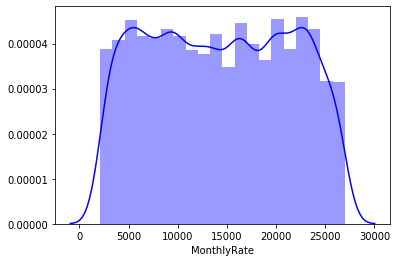

In [289]:

sns.distplot(df['MonthlyRate'],20,color='b')

In [290]:
df['MonthlyRate'].mean()

14302.076757222942

In [291]:
df['MonthlyRate'].min()

2094.0

In [292]:
df['MonthlyRate'].max()

26999.0

In [293]:
# Avg monthly rate of employees is around 14302,min monthly rate is 2094 and max monthly rate is 26999.


# NumCompaniesWorked

In [294]:
df['NumCompaniesWorked'].value_counts()

1.0    8209
0.0    3144
3.0    2493
2.0    2303
4.0    2181
7.0    1167
6.0    1104
5.0     994
9.0     810
8.0     785
Name: NumCompaniesWorked, dtype: int64

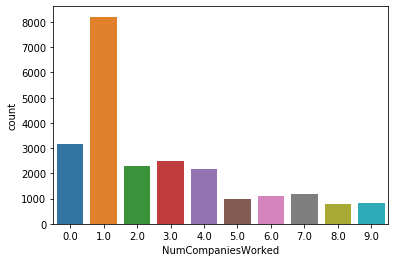

In [295]:
sns.countplot(df['NumCompaniesWorked'])

In [296]:
# Maximum employees have worked in only 1 company.

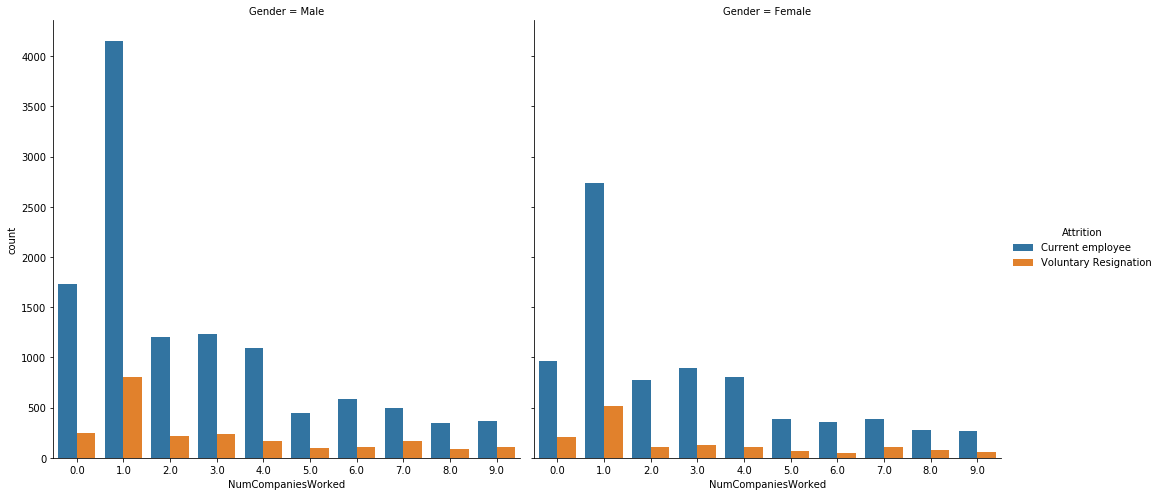

In [297]:
sns.catplot(x='NumCompaniesWorked',hue='Attrition',col='Gender',data=df,kind='count',height=7)


In [298]:
# It can be observed that employees who have worked in 1 company have higher attrition rate


# Over18

In [299]:

df['Over18'].value_counts()

Y    23190
Name: Over18, dtype: int64

# OverTime

In [300]:
df['OverTime'].value_counts()

No     16626
Yes     6564
Name: OverTime, dtype: int64

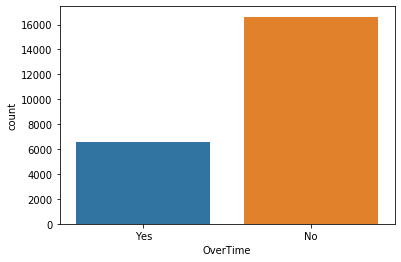

In [301]:

sns.countplot(df['OverTime'])

In [302]:
# Approximately ratio of employees doing overtime and employees not doing overtime is 30:70

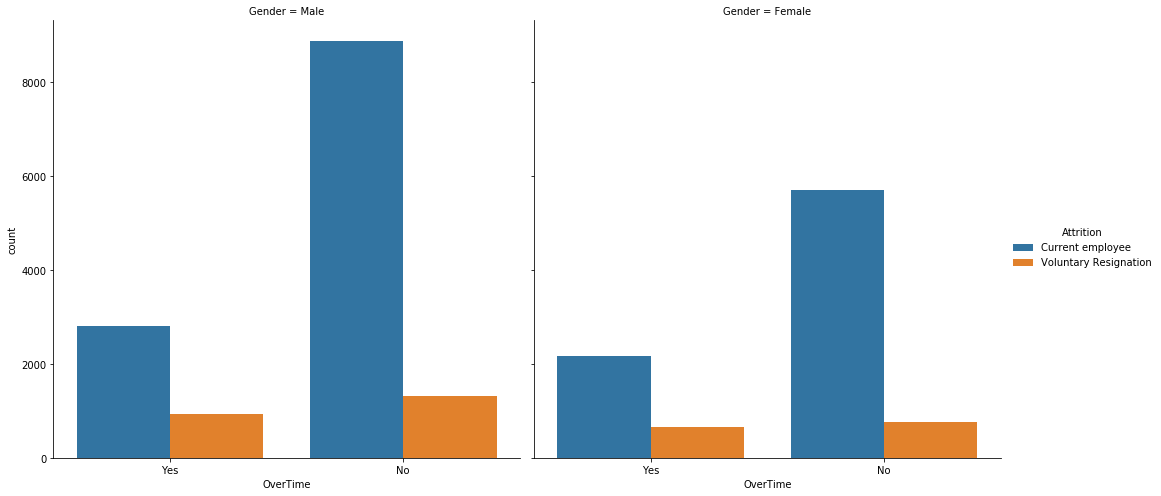

In [303]:
sns.catplot(x='OverTime',hue='Attrition',col='Gender',data=df,kind='count',height=7)

In [304]:
  #A very high attrition rate is seen in employees who are doing overtime for both male and female.

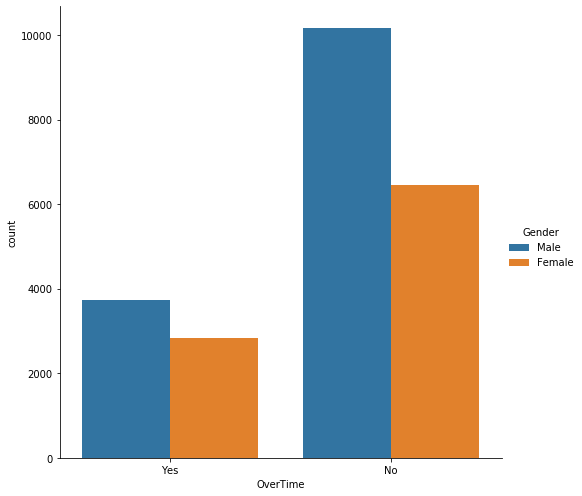

In [305]:
sns.catplot(x='OverTime',hue='Gender',data=df,kind='count',height=7)

In [306]:
# Male has a higher attrition rate in both cases

# PercentSalaryHike

In [307]:
df['PercentSalaryHike'].value_counts()

13    3317
11    3316
14    3180
12    3086
15    1578
18    1400
17    1302
16    1235
19    1203
22     883
20     864
21     765
23     443
24     338
25     280
Name: PercentSalaryHike, dtype: int64

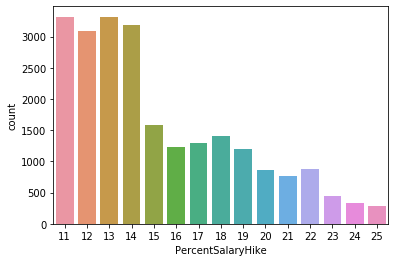

In [308]:
sns.countplot(df['PercentSalaryHike'])

In [309]:
# Majority of employees got a salary hike less than 15%


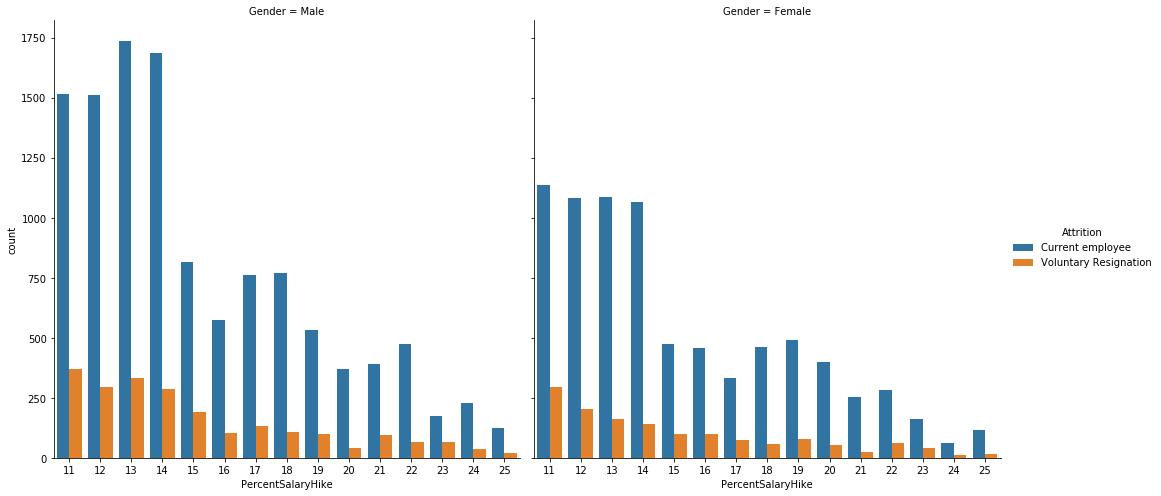

In [310]:
sns.catplot(x='PercentSalaryHike',hue='Attrition',col='Gender',data=df,kind='count',height=7)


In [311]:
# Higher attrition is observed in cases where the salary hike is less than 16% for male when compared to female.


# PerformanceRating

In [312]:
df['PerformanceRating'].value_counts()

3.0    19590
4.0     3600
Name: PerformanceRating, dtype: int64

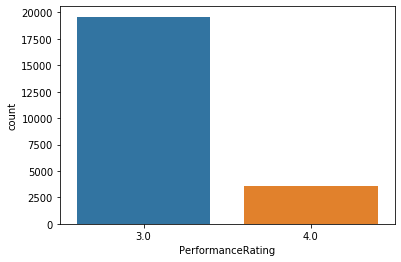

In [313]:
sns.countplot(df['PerformanceRating'])

In [314]:
# There are very few employees who have performance rating 4.

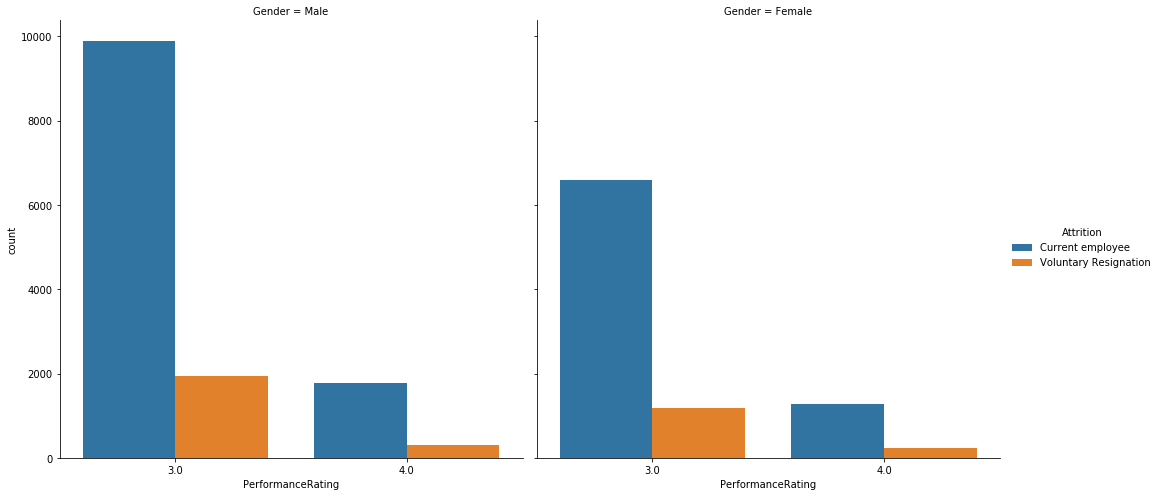

In [315]:
sns.catplot(x='PerformanceRating',hue='Attrition',col='Gender',data=df,kind='count',height=7)


In [316]:
# Performance Rating 3 has higher rate of attrition for both male and female.


# RelationshipSatisfaction

In [317]:
df['RelationshipSatisfaction'].value_counts()

3.0    7216
4.0    6834
2.0    4802
1.0    4338
Name: RelationshipSatisfaction, dtype: int64

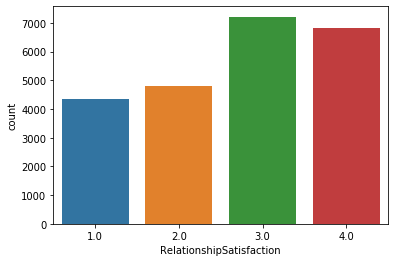

In [318]:
sns.countplot(df['RelationshipSatisfaction'])

In [319]:
# Count of employees having relationship satisfaction 3,4 are more than 1,2

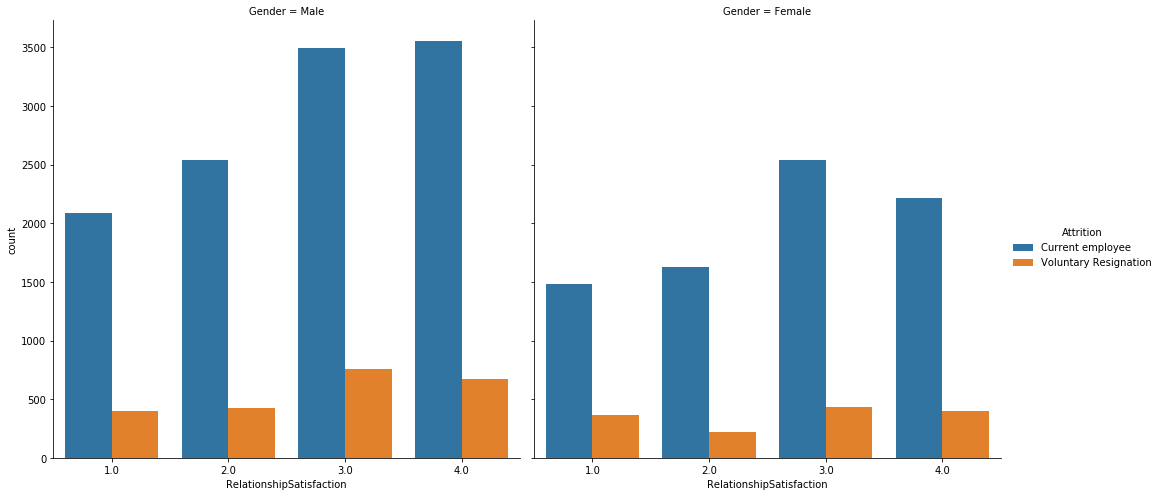

In [320]:
sns.catplot(x='RelationshipSatisfaction',hue='Attrition',col='Gender',data=df,kind='count',height=7)


In [321]:
# Higher attrition is observed in lower relationship satisfaction for both genders


# StandardHours

In [322]:
df['StandardHours'].value_counts()

80.0    23190
Name: StandardHours, dtype: int64

# StockOptionLevel

In [323]:
df['StockOptionLevel'].value_counts()

0.0    9938
1.0    9407
2.0    2519
3.0    1326
Name: StockOptionLevel, dtype: int64

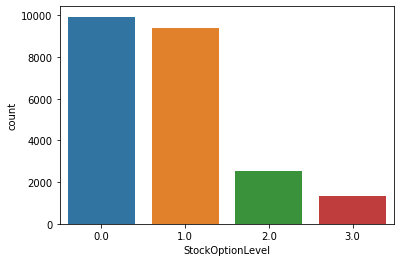

In [324]:
sns.countplot(df['StockOptionLevel'])

In [325]:
# There are many employees who does not have stock options level,
# As the stock options level increases the count of employees reduces.


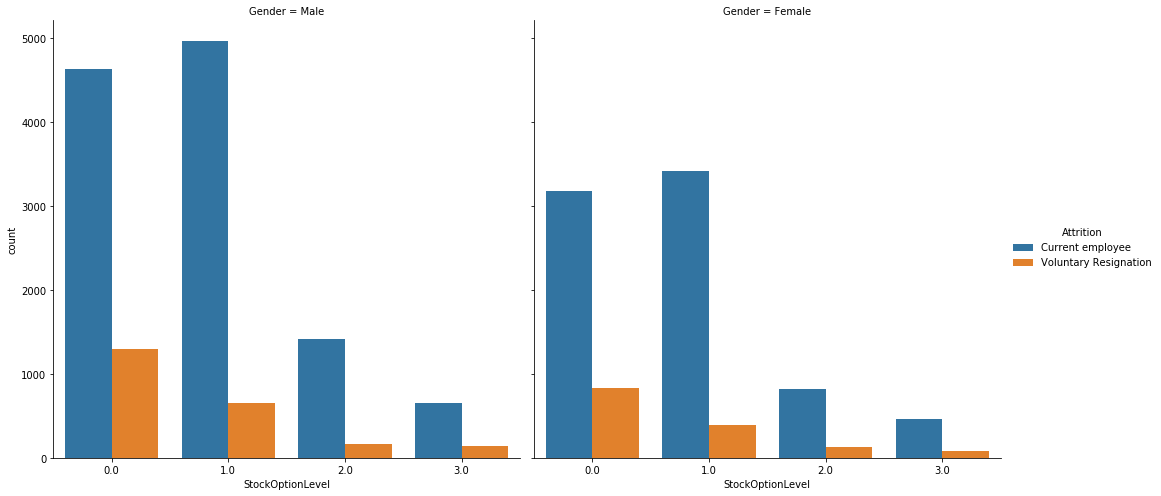

In [326]:
sns.catplot(x='StockOptionLevel',hue='Attrition',col='Gender',data=df,kind='count',height=7)


In [327]:
# Higher attrition rate is observed in lower stock options level for both genders.


# TotalWorkingYears

In [328]:
df['TotalWorkingYears'].value_counts()

10.0    3214
6.0     1970
8.0     1626
9.0     1525
5.0     1381
7.0     1274
1.0     1264
4.0      978
12.0     751
3.0      665
15.0     617
16.0     610
11.0     567
13.0     566
21.0     536
17.0     511
14.0     486
2.0      482
20.0     476
18.0     423
23.0     352
19.0     349
22.0     327
24.0     286
26.0     221
28.0     220
25.0     219
0.0      202
29.0     159
32.0     148
31.0     146
33.0     110
27.0     104
30.0     103
36.0      90
34.0      81
37.0      55
35.0      45
40.0      35
38.0      16
Name: TotalWorkingYears, dtype: int64

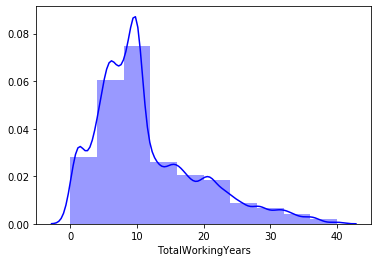

In [329]:
sns.distplot(df['TotalWorkingYears'],bins=10,color='b')

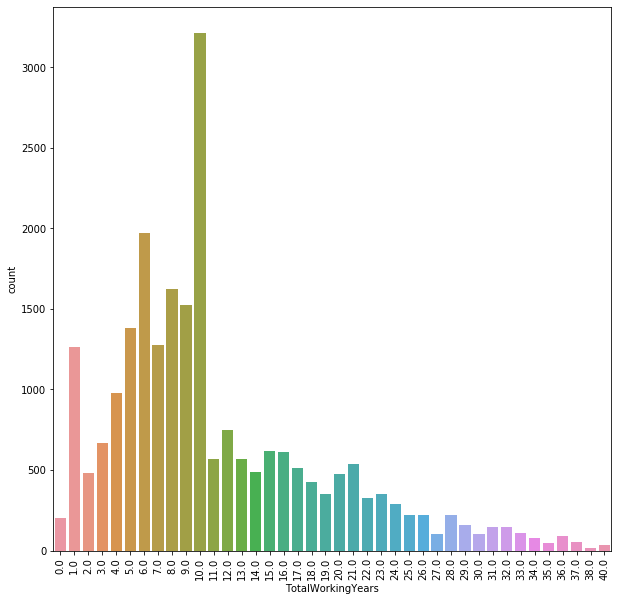

In [330]:
plt.figure(figsize=(10,10))
plt.xticks(rotation='vertical')
sns.countplot(df['TotalWorkingYears'])

In [331]:
# Maximum number of employees have total working years as 10 and the count decreases gradually after 10 years.


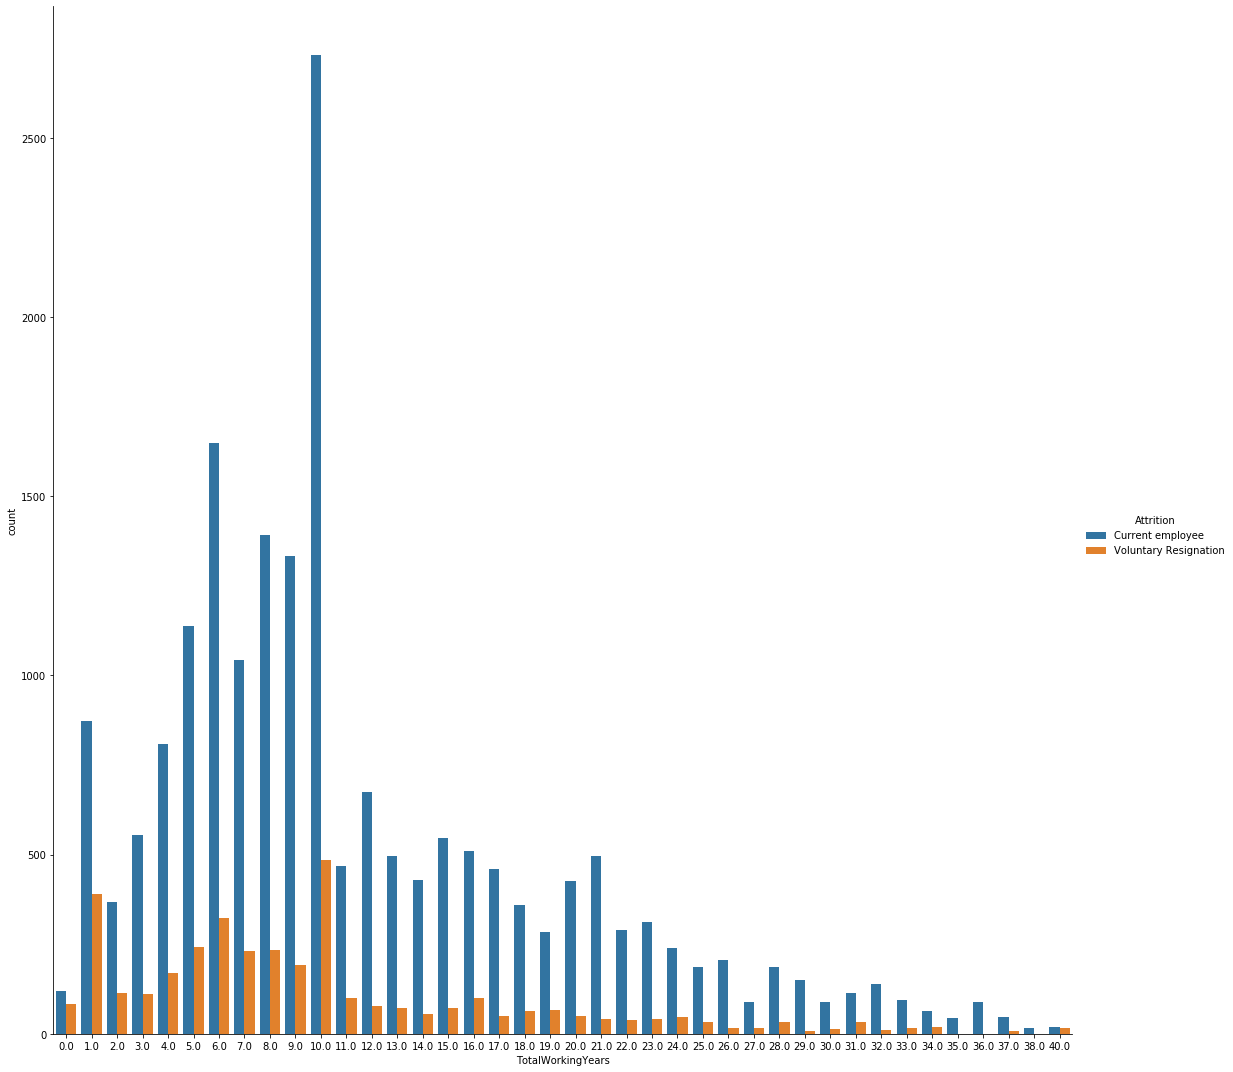

In [332]:
sns.catplot(x='TotalWorkingYears',hue='Attrition',data=df,kind='count',height=15)


In [333]:
# Higher attrition rate is observed for employees having total working years less than 10 years.


# TrainingTimesLastYear


In [334]:
df['TrainingTimesLastYear'].value_counts()


2.0    8641
3.0    7729
4.0    1949
5.0    1861
1.0    1120
6.0    1036
0.0     854
Name: TrainingTimesLastYear, dtype: int64

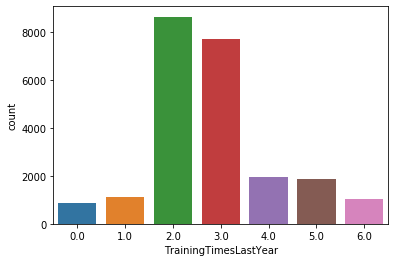

In [335]:
sns.countplot(df['TrainingTimesLastYear'])


In [336]:
# Maximum employees where trained 2 to 3 times since last year


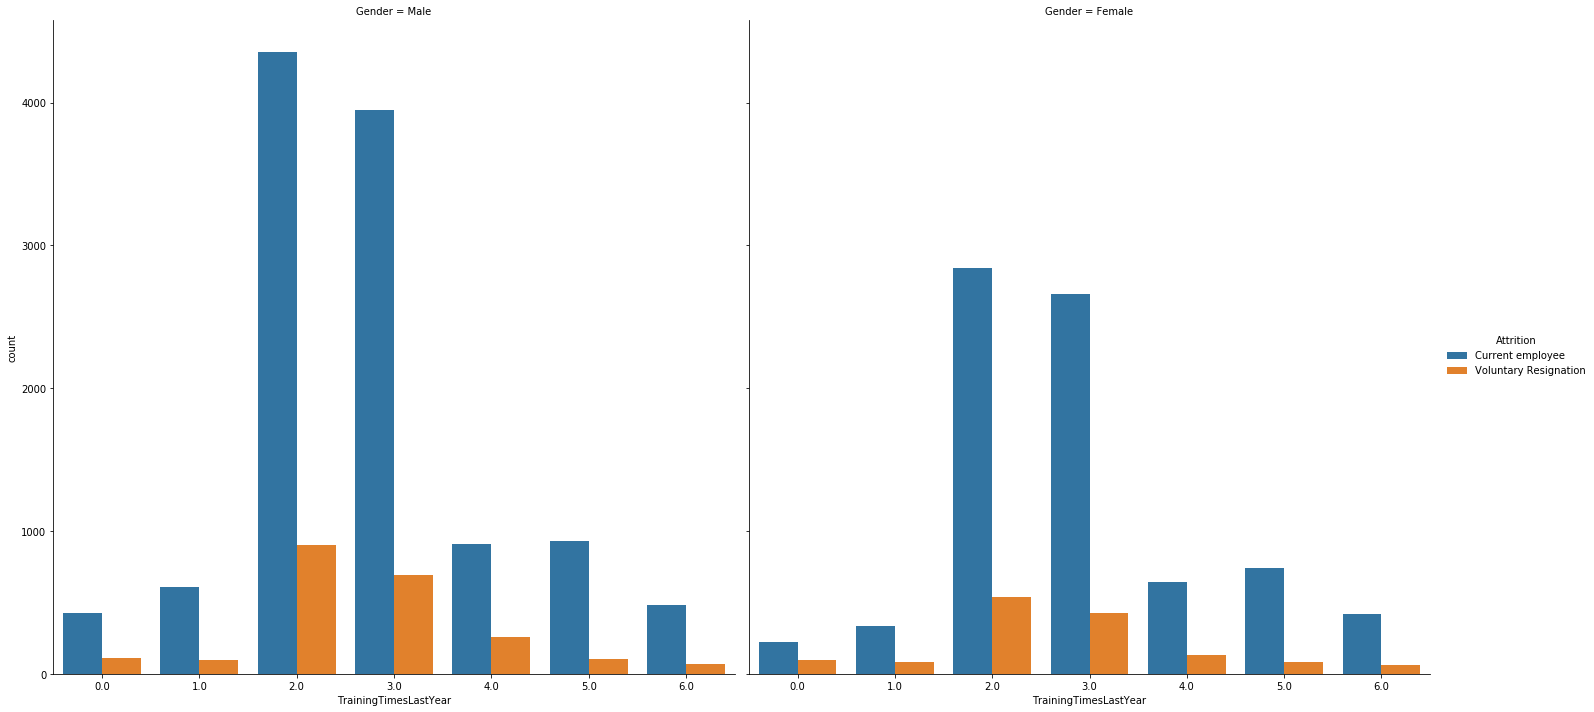

In [337]:
sns.catplot(x='TrainingTimesLastYear',hue='Attrition',col='Gender',data=df,kind='count',height=10)


In [338]:
# Higher attrition rate can be seen where number of trainings given to employees are less for both gender.


# WorkLifeBalance


In [339]:
df['WorkLifeBalance'].value_counts()


3.0    14099
2.0     5428
4.0     2409
1.0     1254
Name: WorkLifeBalance, dtype: int64

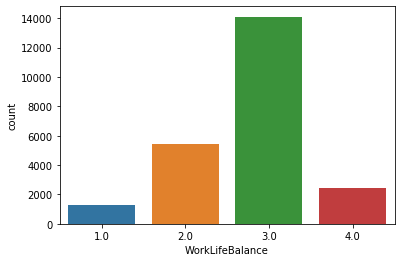

In [340]:
sns.countplot(df['WorkLifeBalance'])


In [341]:
# Count of employees having worklife balance as 3 is more wrt others


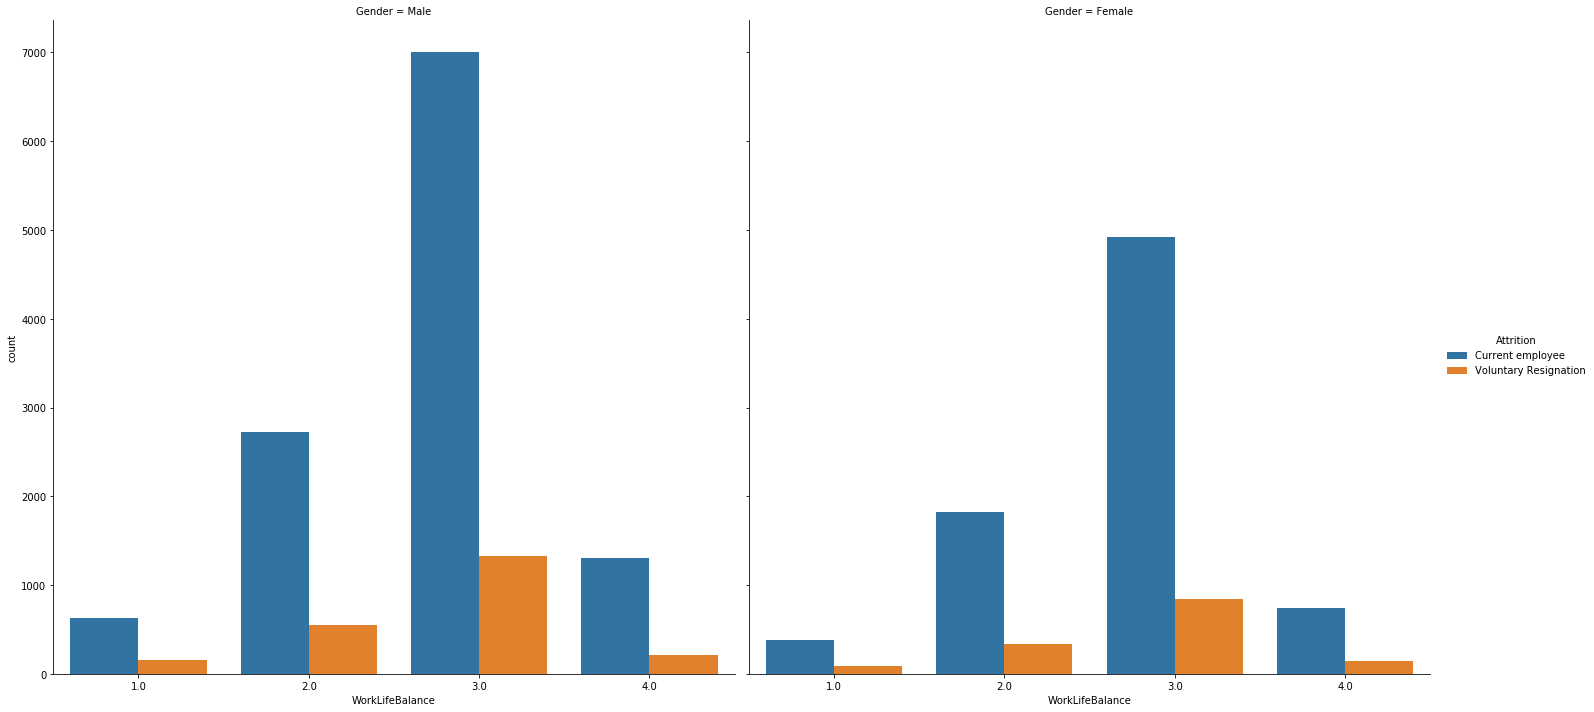

In [342]:
sns.catplot(x='WorkLifeBalance',hue='Attrition',col='Gender',data=df,kind='count',height=10)


In [343]:
# Lower work life balance has somewhat high rate of attrition


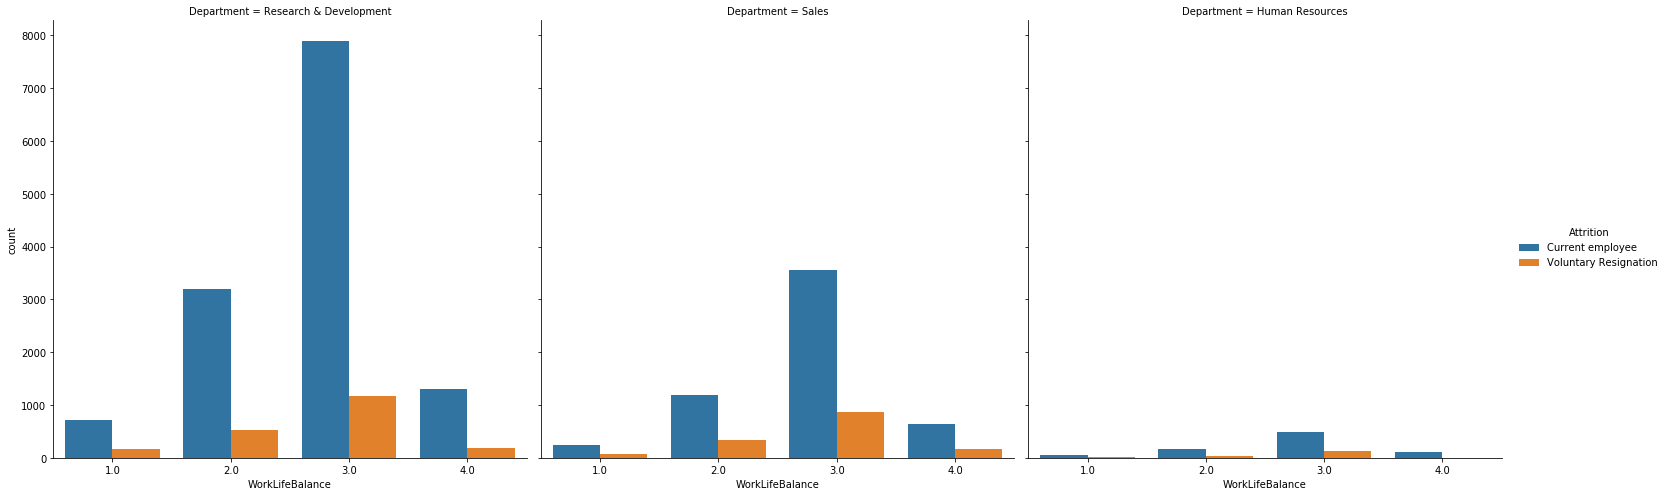

In [344]:
sns.catplot(x='WorkLifeBalance',hue='Attrition',col='Department',data=df,kind='count',height=7)


In [345]:
# HR Department has less attrition rate in any cases of work life balance


# YearsAtCompany¶


In [346]:
df['YearsAtCompany'].value_counts()


5.0     3084
1.0     2687
3.0     2005
2.0     1993
10.0    1913
4.0     1736
7.0     1405
9.0     1286
8.0     1259
6.0     1200
0.0      726
11.0     509
20.0     434
13.0     366
15.0     309
14.0     303
22.0     237
12.0     218
21.0     217
18.0     203
16.0     196
19.0     174
17.0     142
24.0      95
33.0      84
26.0      64
25.0      64
31.0      48
32.0      48
23.0      32
27.0      31
29.0      30
36.0      30
37.0      16
34.0      16
30.0      15
40.0      15
Name: YearsAtCompany, dtype: int64

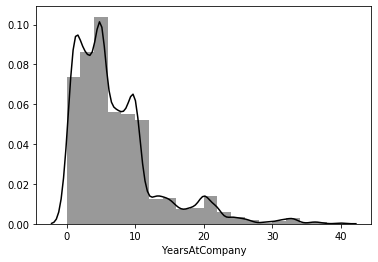

In [347]:
sns.distplot(df['YearsAtCompany'],bins=20,color='k')


In [348]:
# Count of employees is maximum who have worked less than 8 years


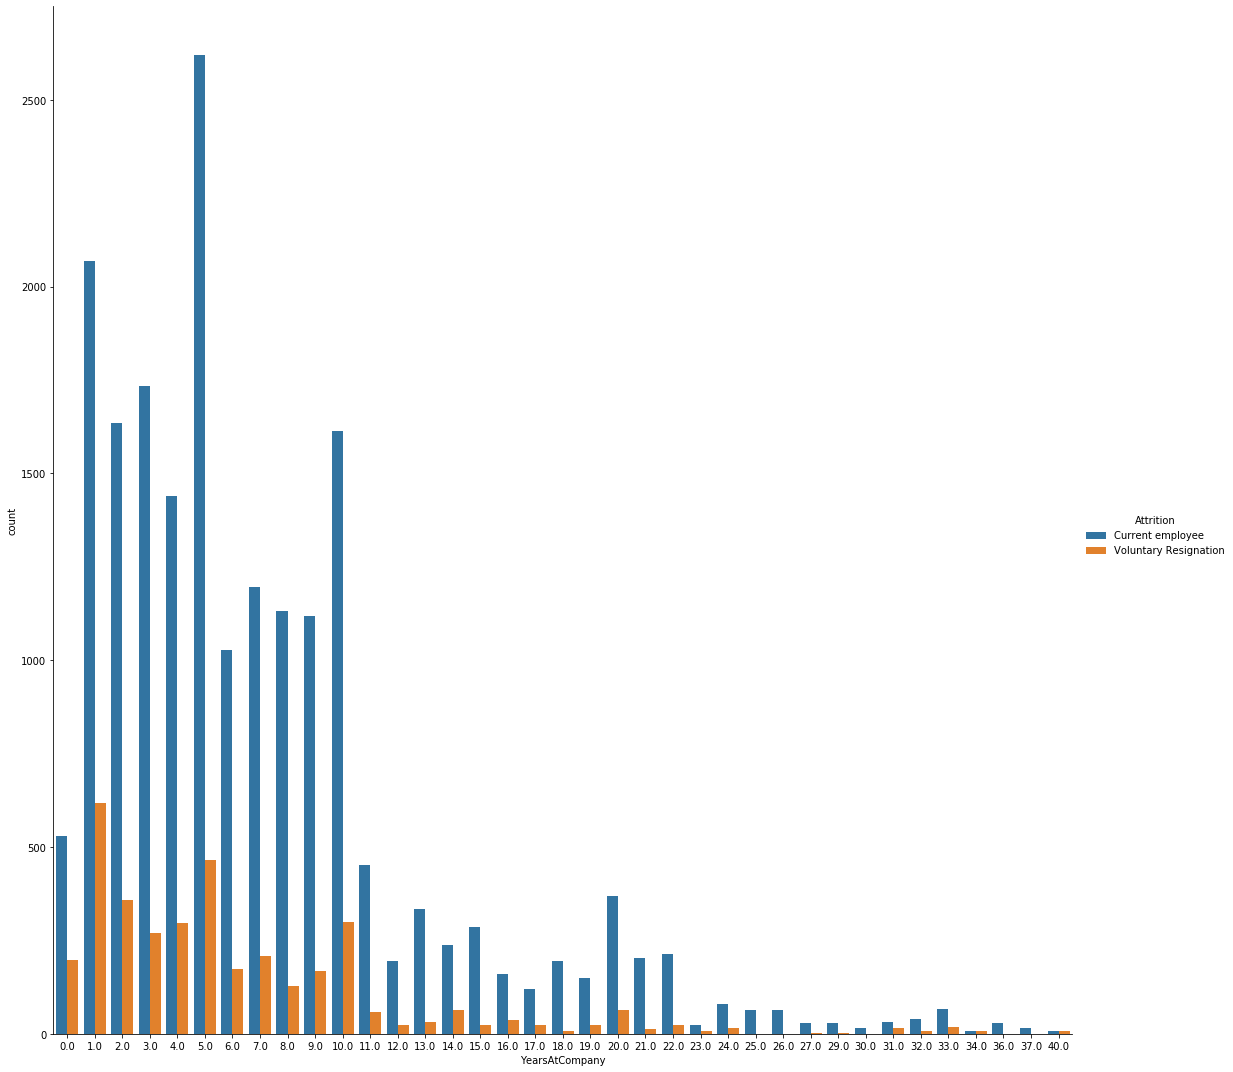

In [349]:
sns.catplot(x='YearsAtCompany',hue='Attrition',data=df,kind='count',height=15)


In [350]:
# We can see higher attrition rate for those employees who have worked for less than 10 years


# YearsInCurrentRole


In [351]:
df['YearsInCurrentRole'].value_counts()


2.0     5878
0.0     3877
7.0     3488
3.0     2121
4.0     1611
8.0     1415
9.0     1063
1.0      875
6.0      589
5.0      585
10.0     452
11.0     358
13.0     218
14.0     174
12.0     148
15.0     133
16.0     110
17.0      63
18.0      32
Name: YearsInCurrentRole, dtype: int64

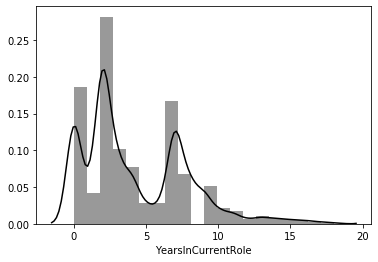

In [352]:
sns.distplot(df['YearsInCurrentRole'],bins=20,color='k')


In [353]:
# Count of employees having 2 to 3 years in current role are more.


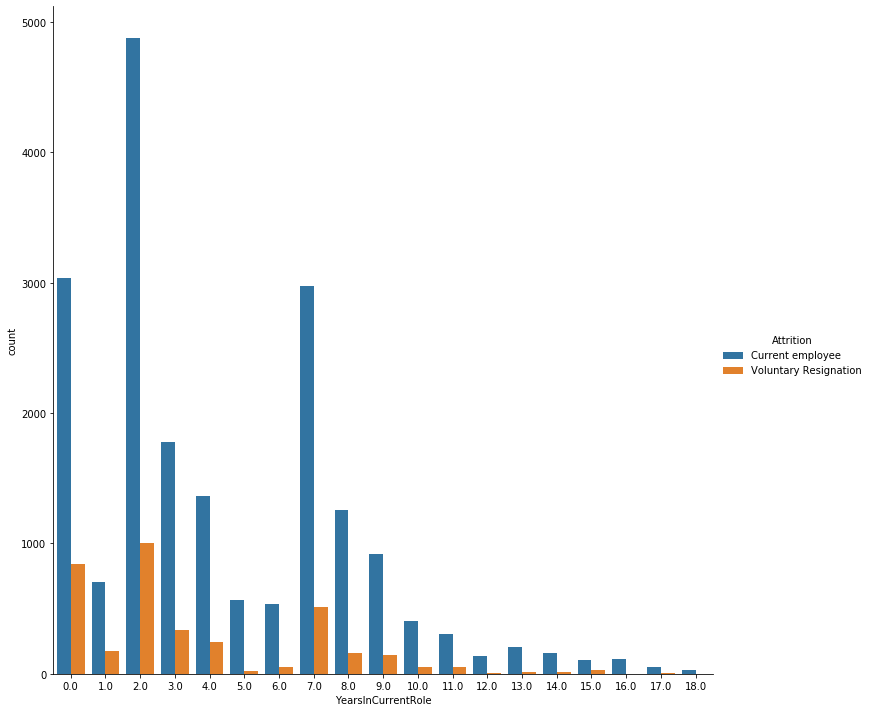

In [354]:
sns.catplot(x='YearsInCurrentRole',hue='Attrition',data=df,kind='count',height=10)


In [355]:
# After 5 years in same role,attrition rate gradually decreases with increase in years.


In [356]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23190 entries, 2259 to 5923
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23190 non-null  float64
 1   Attrition                 23190 non-null  object 
 2   BusinessTravel            23190 non-null  object 
 3   DailyRate                 23190 non-null  float64
 4   Department                23190 non-null  object 
 5   DistanceFromHome          23190 non-null  int32  
 6   Education                 23190 non-null  float64
 7   EducationField            23190 non-null  object 
 8   EmployeeCount             23190 non-null  object 
 9   EmployeeNumber            23190 non-null  object 
 10  Application ID            23190 non-null  object 
 11  EnvironmentSatisfaction   23190 non-null  float64
 12  Gender                    23190 non-null  object 
 13  HourlyRate                23190 non-null  int32  
 14  JobI

# YearsSinceLastPromotion¶


In [357]:
df['YearsSinceLastPromotion'].value_counts()


0.0     9178
1.0     5624
2.0     2514
7.0     1206
4.0      954
3.0      835
5.0      703
6.0      501
11.0     374
8.0      281
9.0      266
15.0     204
13.0     157
12.0     155
14.0     143
10.0      95
Name: YearsSinceLastPromotion, dtype: int64

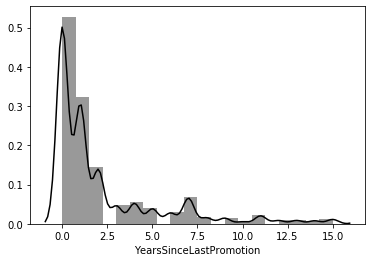

In [358]:
sns.distplot(df['YearsSinceLastPromotion'],bins=20,color='k')


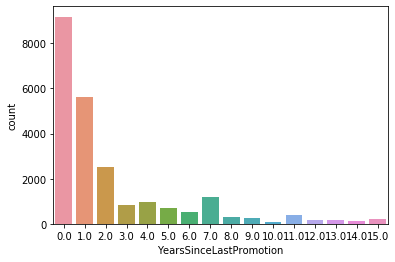

In [359]:
sns.countplot(df['YearsSinceLastPromotion'])


In [360]:
# Majority of employees are in the category of having 0,1 or 2 years since last promotion.


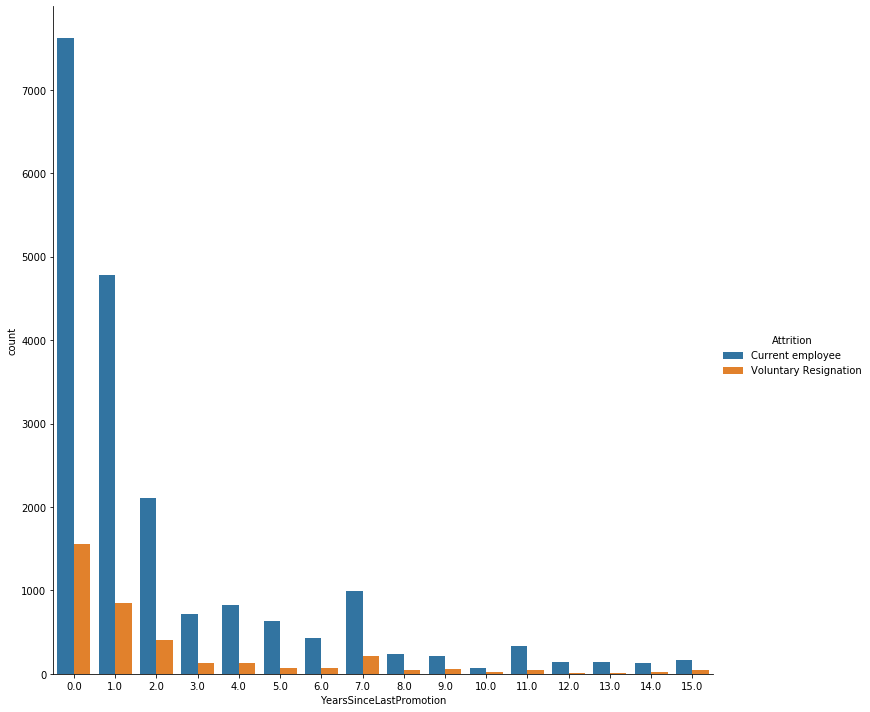

In [361]:
sns.catplot(x='YearsSinceLastPromotion',hue='Attrition',data=df,kind='count',height=10)


In [362]:
# Attrition rate is higher where Years since last promotion is less than 7


# YearsWithCurrManager


In [363]:
df['YearsWithCurrManager'].value_counts()


2.0     5410
0.0     4151
7.0     3413
3.0     2230
8.0     1683
4.0     1550
1.0     1199
9.0     1032
5.0      487
6.0      454
10.0     429
11.0     346
12.0     274
13.0     233
17.0     112
14.0      78
15.0      78
16.0      31
Name: YearsWithCurrManager, dtype: int64

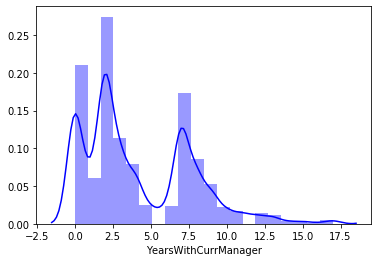

In [364]:
sns.distplot(df['YearsWithCurrManager'],bins=20,color='b')


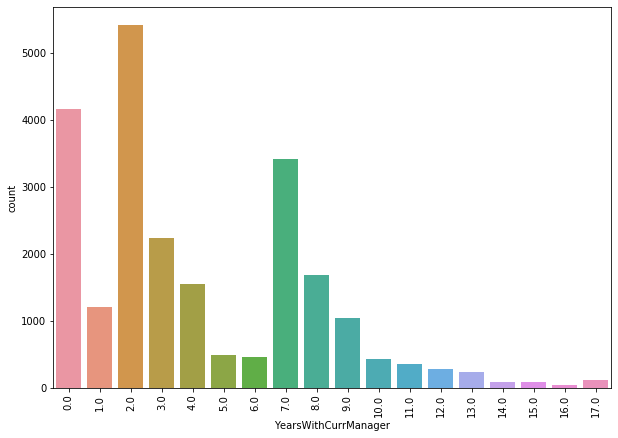

In [365]:
plt.figure(figsize=(10,7))
plt.xticks(rotation='vertical')
sns.countplot(df['YearsWithCurrManager'])

In [366]:
# Majority of employees areworking with their manager for around 2 years.


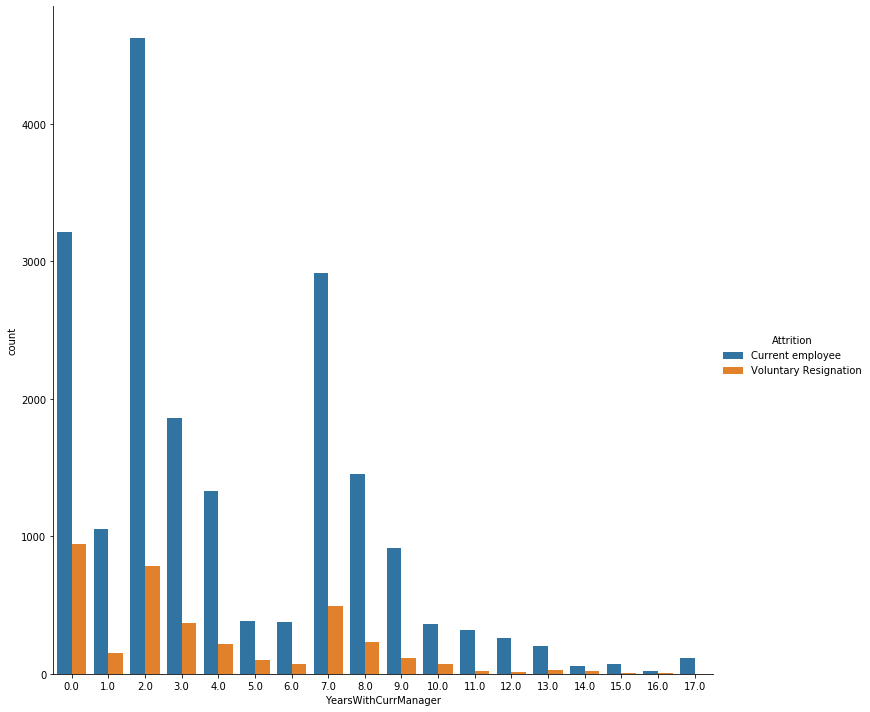

In [367]:
sns.catplot(x='YearsWithCurrManager',hue='Attrition',data=df,kind='count',height=10)


In [368]:
# As the employees work for more years with same manager,they get mentally attached with that manager and have a good comfort zone.
# Hence, they get retained for a longer period of time.
# But there are a few exceptions where the attrition rate is high even if the years are more.This maybe due to internal disputes.So,regular counselling should be done.

# Employee Source


In [369]:
df['Employee Source'].value_counts()


Company Website    5355
Seek               3641
Indeed             2507
Jora               2397
LinkedIn           2314
Recruit.net        2306
GlassDoor          2157
Adzuna             2103
Referral            409
Test                  1
Name: Employee Source, dtype: int64

In [370]:
# Since there is only 1 entry in Test,we will simply shift in other group


In [371]:
df.loc[df['Employee Source']=='Test','Employee Source']='Company Website'


In [372]:
df['Employee Source'].value_counts()


Company Website    5356
Seek               3641
Indeed             2507
Jora               2397
LinkedIn           2314
Recruit.net        2306
GlassDoor          2157
Adzuna             2103
Referral            409
Name: Employee Source, dtype: int64

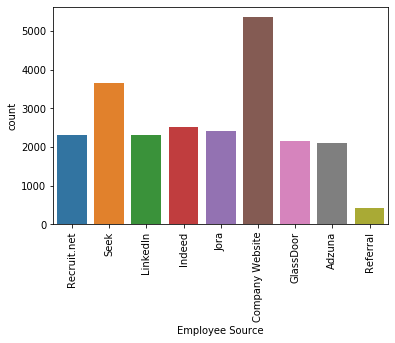

In [373]:
plt.xticks(rotation='vertical')
sns.countplot(df['Employee Source'])

In [374]:
# Around 25% employee source is Company Website, so we should management to emhance its worth more.


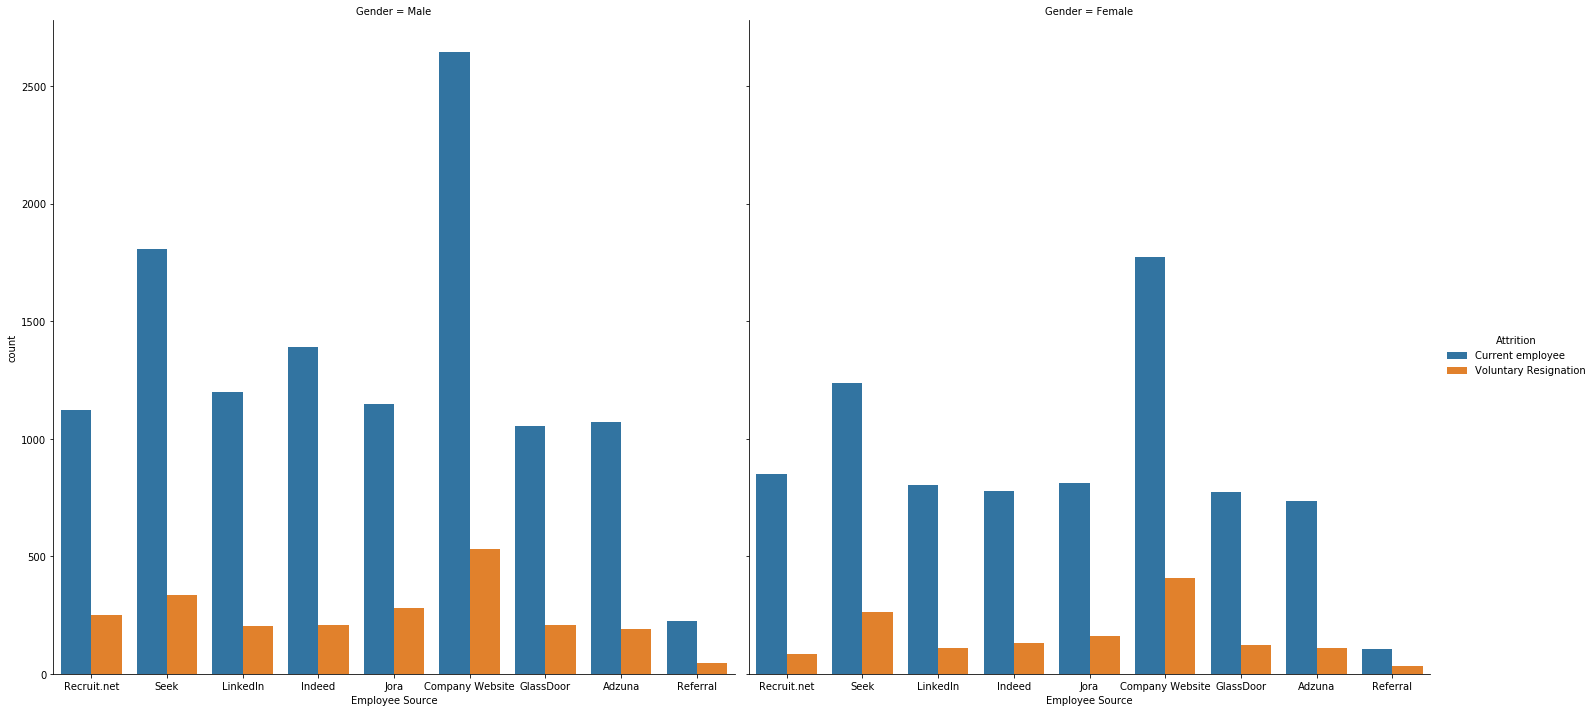

In [375]:
sns.catplot(x='Employee Source',hue='Attrition',col='Gender',data=df,kind='count',height=10)


In [376]:

# At the same time,it is observed that the maximum attrition is taking place for those employees who have joined organization through companies website.
# Hence, reality check should be done in the website.


# DATA CLEANING 

In [377]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,Application ID,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
2259,34.0,Current employee,Travel_Rarely,1346.0,Research & Development,19,2.0,Medical,1,12768,136223,3.0,Male,72,3.0,1.0,Laboratory Technician,4,Married,3691,4605.0,1.0,Y,Yes,15,3.0,2.0,80.0,1.0,7.0,3.0,4.0,7.0,7.0,5.0,6.0,Recruit.net
18358,38.0,Current employee,Travel_Frequently,653.0,Research & Development,29,5.0,Life Sciences,1,1040,124495,1.0,Male,40,3.0,3.0,Sales Executive,1,Married,9069,11031.0,1.0,Y,No,22,3.0,4.0,80.0,1.0,9.0,3.0,2.0,9.0,8.0,1.0,8.0,Seek
16292,58.0,Voluntary Resignation,Travel_Frequently,781.0,Research & Development,2,1.0,Life Sciences,1,10606,134061,4.0,Male,57,2.0,1.0,Laboratory Technician,4,Divorced,2380,13384.0,1.0,Y,Yes,14,3.0,4.0,80.0,1.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0,LinkedIn
1546,18.0,Current employee,Non-Travel,287.0,Research & Development,5,2.0,Life Sciences,1,11663,135118,2.0,Male,73,3.0,1.0,Research Scientist,4,Single,1051,13493.0,3.0,Y,No,15,3.0,4.0,80.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,Indeed
17622,45.0,Voluntary Resignation,Travel_Rarely,1449.0,Sales,2,3.0,Marketing,1,11792,135247,3.0,Male,70,2.0,3.0,Healthcare Representative,3,Single,10999,22245.0,7.0,Y,No,14,3.0,2.0,80.0,0.0,27.0,3.0,3.0,15.0,11.0,4.0,8.0,Jora


In [378]:
df.shape

(23190, 37)

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23190 entries, 2259 to 5923
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23190 non-null  float64
 1   Attrition                 23190 non-null  object 
 2   BusinessTravel            23190 non-null  object 
 3   DailyRate                 23190 non-null  float64
 4   Department                23190 non-null  object 
 5   DistanceFromHome          23190 non-null  int32  
 6   Education                 23190 non-null  float64
 7   EducationField            23190 non-null  object 
 8   EmployeeCount             23190 non-null  object 
 9   EmployeeNumber            23190 non-null  object 
 10  Application ID            23190 non-null  object 
 11  EnvironmentSatisfaction   23190 non-null  float64
 12  Gender                    23190 non-null  object 
 13  HourlyRate                23190 non-null  int32  
 14  JobI

# Dropping the unnecessary columns and unique identifiers 


In [380]:
df=df.drop(['EmployeeCount','EmployeeNumber','Application ID','StandardHours','Over18'],axis=1)


In [381]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
2259,34.0,Current employee,Travel_Rarely,1346.0,Research & Development,19,2.0,Medical,3.0,Male,72,3.0,1.0,Laboratory Technician,4,Married,3691,4605.0,1.0,Yes,15,3.0,2.0,1.0,7.0,3.0,4.0,7.0,7.0,5.0,6.0,Recruit.net
18358,38.0,Current employee,Travel_Frequently,653.0,Research & Development,29,5.0,Life Sciences,1.0,Male,40,3.0,3.0,Sales Executive,1,Married,9069,11031.0,1.0,No,22,3.0,4.0,1.0,9.0,3.0,2.0,9.0,8.0,1.0,8.0,Seek
16292,58.0,Voluntary Resignation,Travel_Frequently,781.0,Research & Development,2,1.0,Life Sciences,4.0,Male,57,2.0,1.0,Laboratory Technician,4,Divorced,2380,13384.0,1.0,Yes,14,3.0,4.0,1.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0,LinkedIn
1546,18.0,Current employee,Non-Travel,287.0,Research & Development,5,2.0,Life Sciences,2.0,Male,73,3.0,1.0,Research Scientist,4,Single,1051,13493.0,3.0,No,15,3.0,4.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,Indeed
17622,45.0,Voluntary Resignation,Travel_Rarely,1449.0,Sales,2,3.0,Marketing,3.0,Male,70,2.0,3.0,Healthcare Representative,3,Single,10999,22245.0,7.0,No,14,3.0,2.0,0.0,27.0,3.0,3.0,15.0,11.0,4.0,8.0,Jora
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12445,48.0,Current employee,Travel_Rarely,277.0,Research & Development,6,3.0,Marketing,1.0,Male,97,2.0,2.0,Healthcare Representative,3,Single,4240,13119.0,0.0,No,13,3.0,4.0,0.0,19.0,0.0,3.0,2.0,2.0,2.0,2.0,Seek
9539,29.0,Current employee,Travel_Frequently,995.0,Research & Development,2,1.0,Life Sciences,2.0,Male,59,3.0,5.0,Manager,4,Married,19513,9358.0,4.0,Yes,12,3.0,1.0,1.0,26.0,2.0,4.0,2.0,2.0,0.0,1.0,Adzuna
12821,53.0,Current employee,Travel_Rarely,1223.0,Research & Development,7,2.0,Marketing,4.0,Female,50,3.0,5.0,Manager,3,Divorced,18606,18640.0,1.0,No,18,4.0,2.0,1.0,26.0,6.0,3.0,7.0,7.0,4.0,7.0,Recruit.net
6232,26.0,Voluntary Resignation,Non-Travel,265.0,Sales,29,2.0,Technical Degree,4.0,Male,82,3.0,3.0,Sales Executive,4,Divorced,10793,8386.0,8.0,No,18,3.0,1.0,1.0,13.0,5.0,3.0,13.0,7.0,9.0,9.0,Company Website


In [382]:
df.shape

(23190, 32)

# Checking the correlation of target variable with other features


In [383]:
df.corr()


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.012778,0.000782,0.209577,-0.005118,-0.008527,-0.005552,0.249829,0.241613,0.036192,0.035073,-0.007806,0.015963,0.006576,0.325684,0.000090,-0.003373,0.140571,0.099685,0.099153,0.081925
DailyRate,0.012778,1.000000,-0.005855,-0.019011,0.005777,0.023053,0.010538,-0.020115,-0.014758,-0.013757,0.017166,0.010069,-0.008017,0.012023,-0.000218,-0.025568,-0.033629,-0.038988,-0.019449,-0.034171,-0.040121
DistanceFromHome,0.000782,-0.005855,1.000000,0.021607,0.007443,0.022868,0.012483,0.001518,-0.005013,-0.010904,0.065705,0.006932,-0.026039,0.009474,0.010854,-0.014795,0.001184,0.001662,0.001482,-0.002383,-0.002140
Education,0.209577,-0.019011,0.021607,1.000000,-0.028119,-0.002702,0.021088,0.047645,0.040120,-0.004689,0.029360,-0.006218,-0.022006,0.018450,0.071316,-0.005303,0.007677,0.027507,0.042978,0.034850,0.038861
EnvironmentSatisfaction,-0.005118,0.005777,0.007443,-0.028119,1.000000,0.400436,-0.016484,-0.011586,-0.016179,0.025315,0.000470,-0.007348,-0.029997,0.027023,-0.011930,-0.006182,0.015176,-0.013647,-0.004403,-0.000128,-0.017701
HourlyRate,-0.008527,0.023053,0.022868,-0.002702,0.400436,1.000000,0.022638,-0.017728,-0.012890,-0.006956,0.009418,-0.009281,-0.025472,0.039696,-0.004697,-0.000492,0.003998,-0.014506,-0.018159,-0.015509,-0.016291
JobInvolvement,-0.005552,0.010538,0.012483,0.021088,-0.016484,0.022638,1.000000,-0.016010,-0.019343,-0.010767,0.001678,-0.016613,0.031520,0.018607,-0.008086,-0.013211,-0.013012,-0.025973,0.003037,-0.024431,0.018673
JobLevel,0.249829,-0.020115,0.001518,0.047645,-0.011586,-0.017728,-0.016010,1.000000,0.943149,0.035734,-0.002810,-0.001544,0.019171,0.009930,0.766598,-0.018382,0.034847,0.523205,0.380442,0.347055,0.368308
MonthlyIncome,0.241613,-0.014758,-0.005013,0.040120,-0.016179,-0.012890,-0.019343,0.943149,1.000000,0.029559,-0.015380,-0.000468,0.023383,0.001242,0.764186,-0.021964,0.030181,0.502144,0.355090,0.338036,0.336368
MonthlyRate,0.036192,-0.013757,-0.010904,-0.004689,0.025315,-0.006956,-0.010767,0.035734,0.029559,1.000000,0.003427,0.005161,-0.007338,-0.005832,0.026477,0.000741,0.006247,-0.018415,-0.009750,0.006475,-0.030122


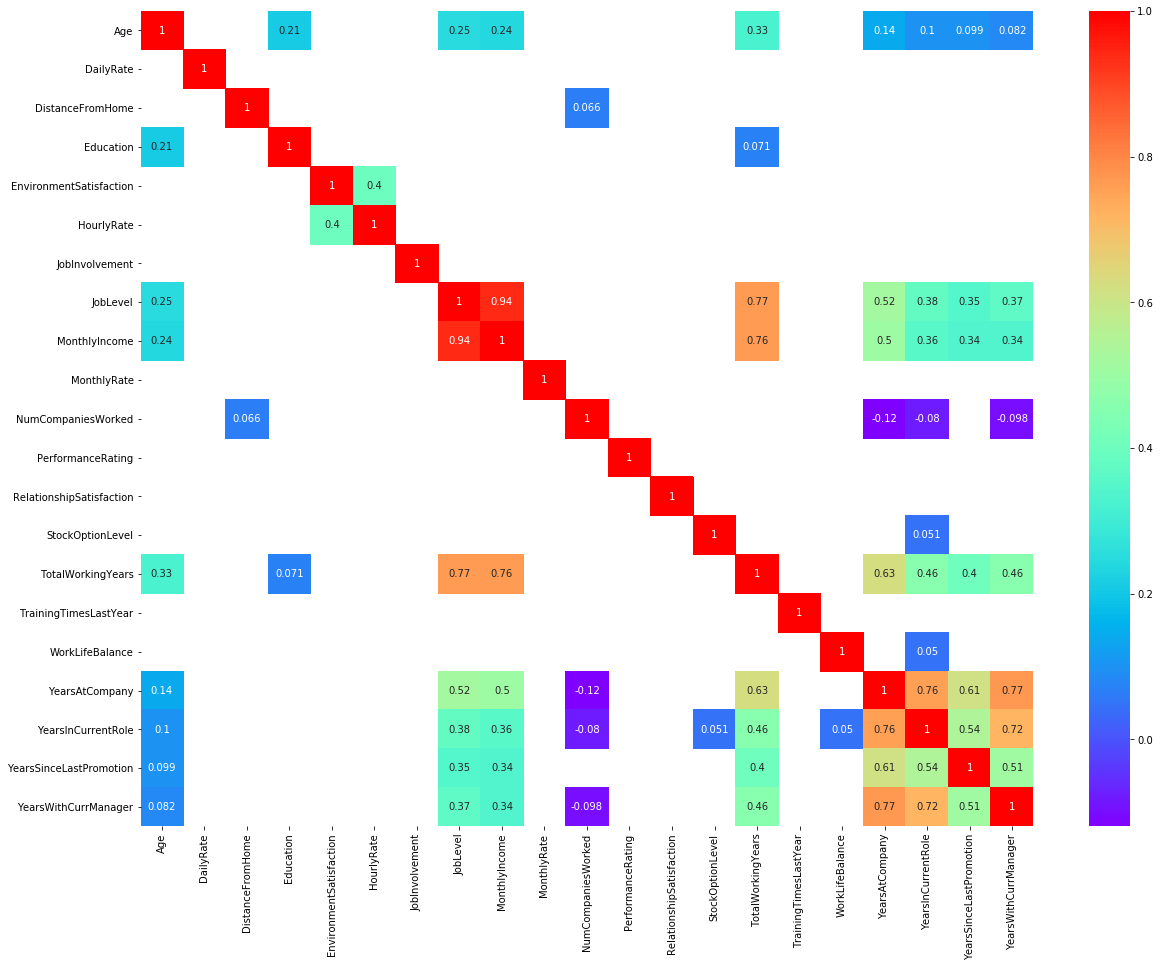

In [387]:
plt.figure(figsize=(20,15))
ax = sns.heatmap(df.corr(),cmap='rainbow',mask=abs(df.corr())<0.05,annot=True)


# Checking for outliers in the dataset:¶


In [391]:
df.skew()

Age                         0.409428
DailyRate                  -0.005304
DistanceFromHome            0.960721
Education                  -0.285631
EnvironmentSatisfaction    -0.320927
HourlyRate                 -0.035167
JobInvolvement             -0.501263
JobLevel                    1.021230
JobSatisfaction            -0.330166
MonthlyIncome               1.367107
MonthlyRate                 0.018858
NumCompaniesWorked          1.025303
PercentSalaryHike           0.817787
PerformanceRating           1.904180
RelationshipSatisfaction   -0.302279
StockOptionLevel            0.962516
TotalWorkingYears           1.113725
TrainingTimesLastYear       0.554956
WorkLifeBalance            -0.551765
YearsAtCompany              1.755288
YearsInCurrentRole          0.915828
YearsSinceLastPromotion     1.987481
YearsWithCurrManager        0.829440
dtype: float64

In [392]:
df.skew()

Age                         0.409428
DailyRate                  -0.005304
DistanceFromHome            0.960721
Education                  -0.285631
EnvironmentSatisfaction    -0.320927
HourlyRate                 -0.035167
JobInvolvement             -0.501263
JobLevel                    1.021230
JobSatisfaction            -0.330166
MonthlyIncome               1.367107
MonthlyRate                 0.018858
NumCompaniesWorked          1.025303
PercentSalaryHike           0.817787
PerformanceRating           1.904180
RelationshipSatisfaction   -0.302279
StockOptionLevel            0.962516
TotalWorkingYears           1.113725
TrainingTimesLastYear       0.554956
WorkLifeBalance            -0.551765
YearsAtCompany              1.755288
YearsInCurrentRole          0.915828
YearsSinceLastPromotion     1.987481
YearsWithCurrManager        0.829440
dtype: float64

# CONVERTING CATEGORICAL COLUMNS TO NUMERICAL COLUMNS¶

In [393]:
df["DistanceFromHome"]=df["DistanceFromHome"].astype('int')
#df["EmployeeCount"]=df["EmployeeCount"].astype('int') 
df["HourlyRate"]=df["HourlyRate"].astype('int')
df["JobSatisfaction"]=df["JobSatisfaction"].astype('int')
df["MonthlyIncome"]=df["MonthlyIncome"].astype('int')
df["PercentSalaryHike"]=df["PercentSalaryHike"].astype('int')                     

In [394]:
#label encoder

In [395]:
#Now we do label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [396]:
df[df.select_dtypes(include= "object").columns]= df[df.select_dtypes(include='object').columns].apply(le.fit_transform)

In [397]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23190 entries, 2259 to 5923
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23190 non-null  float64
 1   Attrition                 23190 non-null  int32  
 2   BusinessTravel            23190 non-null  int32  
 3   DailyRate                 23190 non-null  float64
 4   Department                23190 non-null  int32  
 5   DistanceFromHome          23190 non-null  int32  
 6   Education                 23190 non-null  float64
 7   EducationField            23190 non-null  int32  
 8   EnvironmentSatisfaction   23190 non-null  float64
 9   Gender                    23190 non-null  int32  
 10  HourlyRate                23190 non-null  int32  
 11  JobInvolvement            23190 non-null  float64
 12  JobLevel                  23190 non-null  float64
 13  JobRole                   23190 non-null  int32  
 14  JobS

In [398]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
2259,34.0,0,2,1346.0,1,19,2.0,3,3.0,1,72,3.0,1.0,2,4,1,3691,4605.0,1.0,1,15,3.0,2.0,1.0,7.0,3.0,4.0,7.0,7.0,5.0,6.0,6
18358,38.0,0,1,653.0,1,29,5.0,1,1.0,1,40,3.0,3.0,7,1,1,9069,11031.0,1.0,0,22,3.0,4.0,1.0,9.0,3.0,2.0,9.0,8.0,1.0,8.0,8
16292,58.0,1,1,781.0,1,2,1.0,1,4.0,1,57,2.0,1.0,2,4,0,2380,13384.0,1.0,1,14,3.0,4.0,1.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0,5
1546,18.0,0,0,287.0,1,5,2.0,1,2.0,1,73,3.0,1.0,6,4,2,1051,13493.0,3.0,0,15,3.0,4.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,3
17622,45.0,1,2,1449.0,2,2,3.0,2,3.0,1,70,2.0,3.0,0,3,2,10999,22245.0,7.0,0,14,3.0,2.0,0.0,27.0,3.0,3.0,15.0,11.0,4.0,8.0,4


In [399]:
df.shape

(23190, 32)

In [271]:
# Now our dataset is cleaned and ready for processing

# Splitting the dataset into independent features 'X' and target variable y'

In [400]:
X=df.drop('Attrition',axis=1)
y=df['Attrition']

In [401]:
X.shape

(23190, 31)

In [402]:
y.shape

(23190,)

# Splitting dataset in train and test:

In [406]:
#sampling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X ,y, test_size= .20)

In [407]:
from sklearn.linear_model import LogisticRegression
LogReg=LogisticRegression()


In [408]:
LogReg.fit(X_train,y_train)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [409]:
pred_value=LogReg.predict(X_test)


In [410]:
from sklearn.metrics import confusion_matrix
tab1=confusion_matrix(pred_value,y_test)
tab1

array([[3914,  720],
       [   1,    3]], dtype=int64)

In [411]:
tab1.diagonal().sum()
tab1.sum()
accuracy=tab1.diagonal().sum() / tab1.sum()*100

In [412]:
accuracy

84.45450625269513

In [413]:
df["Attrition"].value_counts()

0    19527
1     3663
Name: Attrition, dtype: int64

In [414]:
#lets check weather target varibale is balanced or not
#target variable is highly imbalance so we need to treat imbalance 

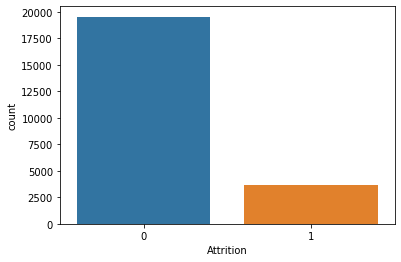

In [415]:
sns.countplot(df['Attrition'])

# now logistic regression  with balanced dataset 

In [561]:
from imblearn.over_sampling import SMOTE
smote = SMOTE('auto')

C:\Users\HP\anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=auto as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


In [562]:
X_sm, y_sm = smote.fit_sample(X_train,y_train)
print(X_sm.shape, y_sm.shape)

(31224, 31) (31224,)


In [563]:
LogReg=LogisticRegression()
LogReg.fit(X_sm,y_sm)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [591]:
pred_value=LogReg.predict(X_test)

In [592]:
from sklearn.metrics import confusion_matrix
tab1=confusion_matrix(pred_value,y_test)
tab1

array([[2443,  320],
       [1472,  403]], dtype=int64)

In [593]:
tab1.diagonal().sum()
tab1.sum()
accuracy=tab1.diagonal().sum() / tab1.sum()*100

In [594]:
accuracy

61.36265631737818

In [595]:
f1 = f1_score(y_test, pred_value)
f1

0.31023864511162436

In [596]:
from sklearn.metrics import classification_report
print( classification_report(pred_value,y_test))

              precision    recall  f1-score   support

           0       0.62      0.88      0.73      2763
           1       0.56      0.21      0.31      1875

    accuracy                           0.61      4638
   macro avg       0.59      0.55      0.52      4638
weighted avg       0.60      0.61      0.56      4638



In [570]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [571]:
auc = roc_auc_score(y_test, pred_value)
auc

0.5907049702442463

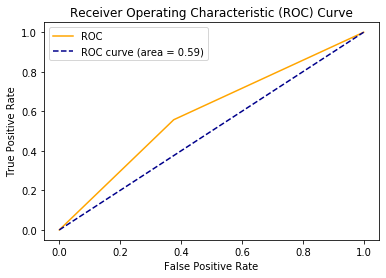

In [572]:
#ROC
fpr, tpr, thresholds = roc_curve(y_test, pred_value)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [573]:
from sklearn.metrics import f1_score

In [574]:
f1 = f1_score(y_test,pred_value)
f1

0.31023864511162436

# decision tree 

In [575]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
dt = DecisionTreeClassifier(criterion = "entropy",max_depth= 4,class_weight = "balanced")

In [579]:
dt.fit(X_sm,y_sm)
pred_dt = dt.predict(X_test)

tab_dt = confusion_matrix(pred_dt,y_test)
tab_dt

array([[2396,  208],
       [1519,  515]], dtype=int64)

In [580]:
Accuracy = tab_dt.diagonal().sum()/tab_dt.sum() *100
Accuracy

62.76412246658042

In [590]:
from sklearn.metrics import classification_report
print( classification_report(pred_dt,y_test))

              precision    recall  f1-score   support

           0       0.61      0.92      0.74      2604
           1       0.71      0.25      0.37      2034

    accuracy                           0.63      4638
   macro avg       0.66      0.59      0.55      4638
weighted avg       0.66      0.63      0.58      4638



In [445]:
dt.feature_importances_ 

array([0.2400742 , 0.        , 0.19102108, 0.        , 0.02634038,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.1245303 , 0.        ,
       0.        , 0.        , 0.25494956, 0.        , 0.        ,
       0.        , 0.        , 0.08387309, 0.04455209, 0.        ,
       0.0346593 ])

In [446]:
importance_score = pd.DataFrame({"Features":X_train.columns, "Importance" :dt.feature_importances_})

In [447]:
importance_score.sort_values("Importance" , ascending = False)

,Features,Importance
22,StockOptionLevel,0.254950
0,Age,0.240074
2,DailyRate,0.191021
18,OverTime,0.124530
27,YearsInCurrentRole,0.083873
28,YearsSinceLastPromotion,0.044552
30,Employee Source,0.034659
4,DistanceFromHome,0.026340
7,EnvironmentSatisfaction,0.000000
8,Gender,0.000000


# random forest

In [130]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
from sklearn.metrics import confusion_matrix

In [448]:
rf.fit(X_sm , y_sm)
pred_rf = rf.predict(X_test)

tab_rf = confusion_matrix(pred_rf, y_test)
tab_rf

array([[3914,   13],
       [   1,  710]], dtype=int64)

In [449]:
Accuracy = tab_rf.diagonal().sum()/tab_rf.sum() *100
Accuracy

99.69814575247952

In [468]:
search_dict={"criterion":["entropy"],
           "max_depth":range(3,6),
          "min_samples_split":range(10,25),
            "n_estimators":[50,100,150,200]}

In [469]:
from sklearn.model_selection import GridSearchCV

In [470]:
grid=GridSearchCV(rf,param_grid=search_dict,cv=10,verbose=2)

In [476]:
grid.fit(X_train ,y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
[CV] criterion=entropy, max_depth=3, min_samples_split=10, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=entropy, max_depth=3, min_samples_split=10, n_estimators=50, total=   0.7s
[CV] criterion=entropy, max_depth=3, min_samples_split=10, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  criterion=entropy, max_depth=3, min_samples_split=10, n_estimators=50, total=   0.6s
[CV] criterion=entropy, max_depth=3, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=3, min_samples_split=10, n_estimators=50, total=   0.6s
[CV] criterion=entropy, max_depth=3, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=3, min_samples_split=10, n_estimators=50, total=   0.6s
[CV] criterion=entropy, max_depth=3, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=3, min_samples_split=10, n_estimators=50, total=   0.7s
[CV] criterion=entropy, max_depth=3, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=3, min_samples_split=10, n_estimators=50, total=   1.1s
[CV] criterion=entropy, max_depth=3, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=3, min_samples_split=10, n_estimators=50, total=   0.7s
[CV] criterion=entropy, max_depth=3, min_samples_split=10, n_estimators=50

[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed: 82.8min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': range(3, 6),
                         'min_samples_split': range(10, 25),
                         'n_estimators': [50, 100, 150, 200]},
             verbose=2)

In [503]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_split': 12,
 'n_estimators': 100}

# knn

In [582]:
from sklearn.neighbors import KNeighborsClassifier

In [583]:
knn = KNeighborsClassifier()

knn.fit(X_sm,y_sm)


KNeighborsClassifier()

In [584]:
pred_knn = knn.predict(X_test)

In [585]:
tab_knn = confusion_matrix(pred_knn, y_test)
tab_knn

array([[3860,   42],
       [  55,  681]], dtype=int64)

In [586]:
Accuracy = tab_knn.diagonal().sum()/tab_knn.sum() *100
Accuracy

97.90858128503666

In [588]:
from sklearn.metrics import classification_report
print( classification_report(pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3902
           1       0.94      0.93      0.93       736

    accuracy                           0.98      4638
   macro avg       0.96      0.96      0.96      4638
weighted avg       0.98      0.98      0.98      4638



# Svm

In [455]:
from sklearn.svm import SVC

In [459]:
svm = SVC()
svm.fit(X_sm,y_sm)

SVC()

In [460]:
pred_svm= svm.predict(X_test)

In [461]:
tab_svm= confusion_matrix(pred_svm, y_test)
tab_svm

array([[2445,  355],
       [1470,  368]], dtype=int64)

In [462]:
Accuracy = tab_svm.diagonal().sum()/tab_svm.sum() *100
Accuracy

60.65114273393705

In [589]:
from sklearn.metrics import classification_report
print( classification_report(pred_svm,y_test))

              precision    recall  f1-score   support

           0       0.62      0.87      0.73      2800
           1       0.51      0.20      0.29      1838

    accuracy                           0.61      4638
   macro avg       0.57      0.54      0.51      4638
weighted avg       0.58      0.61      0.55      4638



# Random forest By grid Searchcv


In [554]:
from sklearn.ensemble import RandomForestClassifier
rf_grid = RandomForestClassifier(criterion= 'entropy', max_depth= 5, min_samples_split=12,n_estimators=100)


In [555]:
rf_grid.fit(X_sm, y_sm)
pred_value = rf_grid.predict(X_test)
tab_rf_grid = confusion_matrix(pred_value, y_test)
tab_rf_grid 

array([[3205,  277],
       [ 710,  446]], dtype=int64)

In [556]:
Accuracy = tab_rf_grid.diagonal().sum() / tab_rf.sum() * 100
Accuracy

78.71927554980596

In [557]:
f1 = f1_score(y_test, pred_value)
f1

0.474720596061735

In [559]:
importance_score = pd.DataFrame({"Features":X_train.columns, "Importance" :rf_grid.feature_importances_})

In [560]:
importance_score.sort_values("Importance" , ascending = False)

,Features,Importance
0,Age,0.159313
22,StockOptionLevel,0.138197
2,DailyRate,0.064455
15,MonthlyIncome,0.064138
18,OverTime,0.061498
17,NumCompaniesWorked,0.041037
1,BusinessTravel,0.040665
4,DistanceFromHome,0.034631
11,JobLevel,0.032155
23,TotalWorkingYears,0.031553


In [550]:
from sklearn.metrics import classification_report
print( classification_report(pred_value,y_test))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      3467
           1       0.63      0.39      0.48      1171

    accuracy                           0.79      4638
   macro avg       0.72      0.66      0.67      4638
weighted avg       0.77      0.79      0.77      4638



In [597]:
import xgboost as xgb
from xgboost import XGBClassifier


In [598]:
model = XGBClassifier(objective='binary:logistic',max_depth= 5, min_samples_split=12,n_estimators=100)
model.fit(X_sm, y_sm)

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:03:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:03:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, min_samples_split=12, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [599]:
pred_model = model.predict(X_test)

In [600]:
tab_model = confusion_matrix(pred_model, y_test)
tab_model

array([[3904,   16],
       [  11,  707]], dtype=int64)

In [602]:
Accuracy = tab_model.diagonal().sum()/tab_model.sum() *100
Accuracy

99.41785252263907

In [603]:
from sklearn.metrics import classification_report
print( classification_report(pred_model,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3920
           1       0.98      0.98      0.98       718

    accuracy                           0.99      4638
   macro avg       0.99      0.99      0.99      4638
weighted avg       0.99      0.99      0.99      4638



# Cross validation

In [511]:
from sklearn.model_selection import cross_val_score

In [528]:
rf_grid = RandomForestClassifier()

In [537]:
cross_val = cross_val_score(rf_grid,X_sm , y_sm ,cv = 10,scoring="accuracy")

In [532]:
cross_val

array([0.99551713, 0.99423631, 0.99743836, 0.99743836, 0.99903908,
       0.99871877, 0.99903908, 0.99967969, 0.99871877, 0.99807816])

In [533]:
cross_val.max()

0.9996796925048046

In [534]:
cross_val.min()

0.9942363112391931

In [535]:
cross_val.mean()

0.9977903705905412